In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [2]:
# 读取数据
data = pd.read_csv('spotify_dataset.csv')
features = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
            'Liveness', 'Tempo', 'Duration (ms)', 'Valence']

df = data[features]

In [3]:
# 删除空值
df = df.replace(' ', np.nan)
df = df.dropna().astype(float)

In [4]:
# 标准化
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

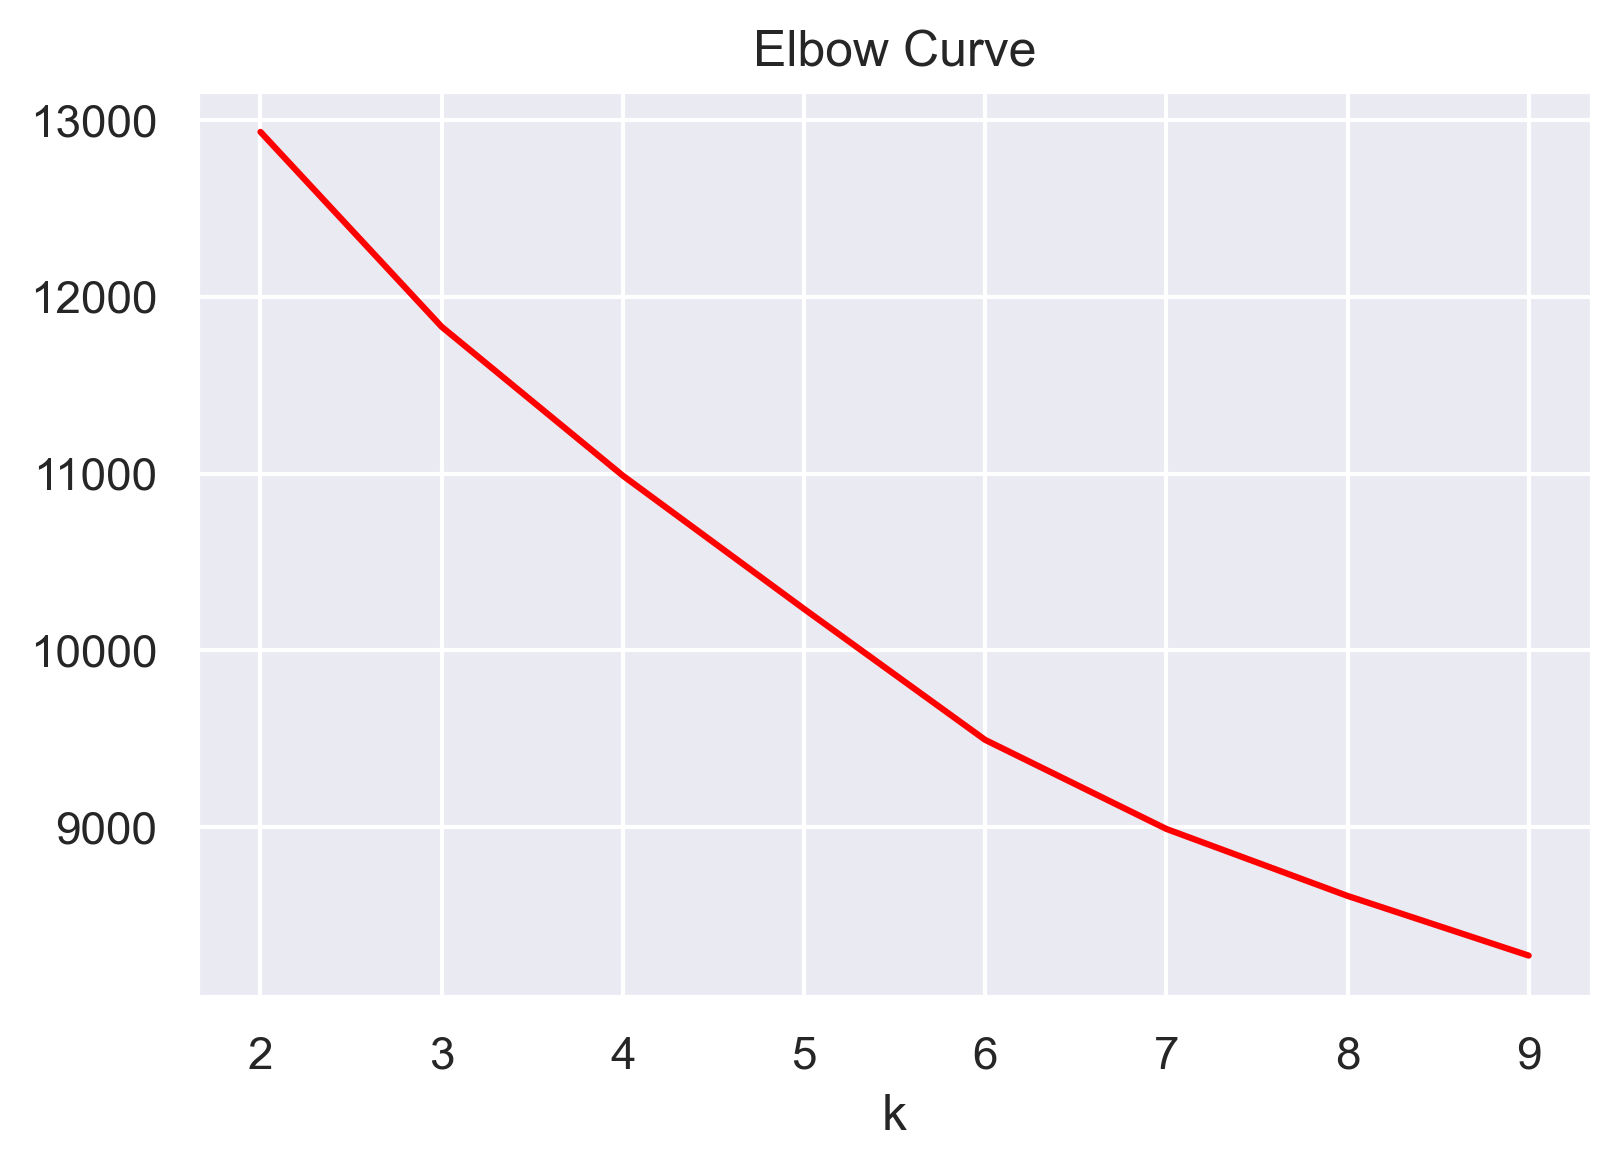

In [5]:
from sklearn.cluster import KMeans
# kmeans
X = df_std.copy()
distorsions = []
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    distorsions.append(model.inertia_)
plt.figure(dpi=300)
plt.plot(range(2, 10), distorsions, color='red')
plt.grid(True)
plt.xlabel('k')
plt.title('Elbow Curve')
plt.savefig('ElbowCurve.png')

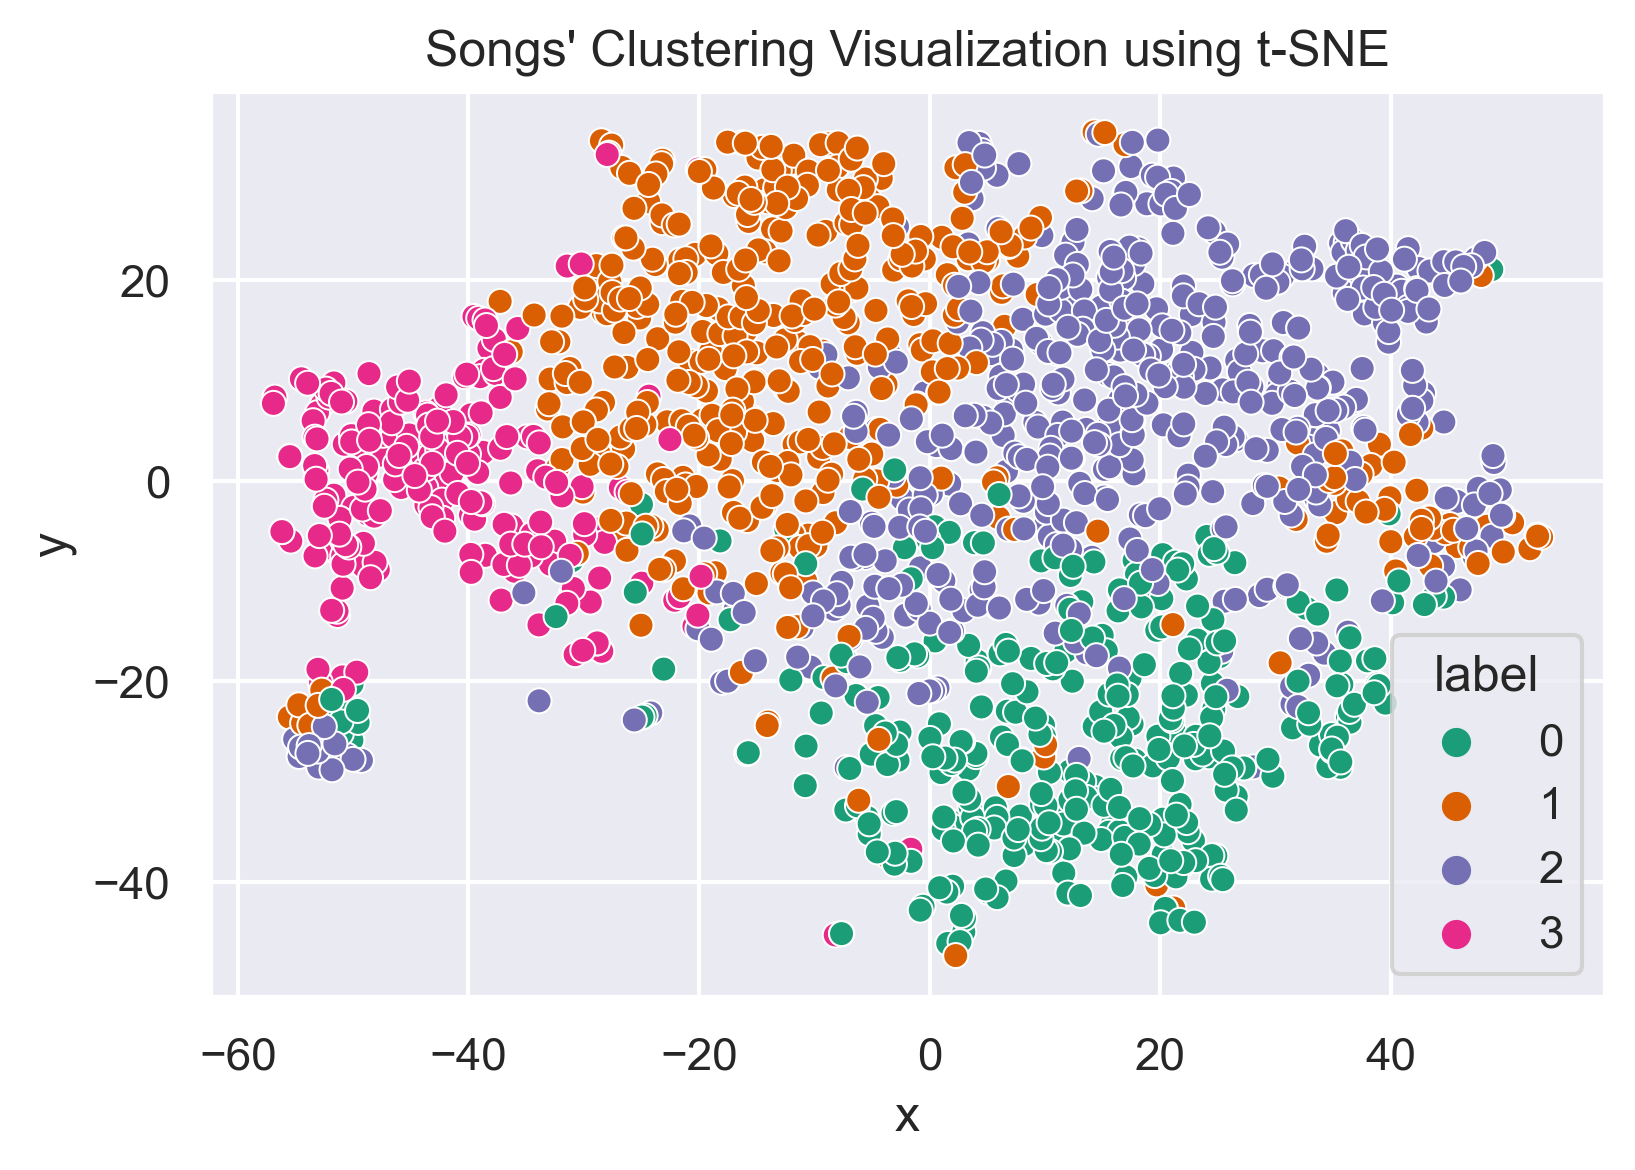

In [6]:
model = KMeans(n_clusters=4)
model.fit(X)
y = model.labels_

from sklearn.manifold import TSNE
tsne_obj = TSNE()
tsne = tsne_obj.fit_transform(X)
tsne_df = pd.DataFrame(tsne, columns=['x', 'y'])
tsne_df['label'] = y
plt.figure(dpi=300)
sns.scatterplot(data=tsne_df, x='x', y='y', hue='label', palette='Dark2', linewidths=0.5)
plt.title("Songs' Clustering Visualization using t-SNE")
plt.savefig('cluster.png')

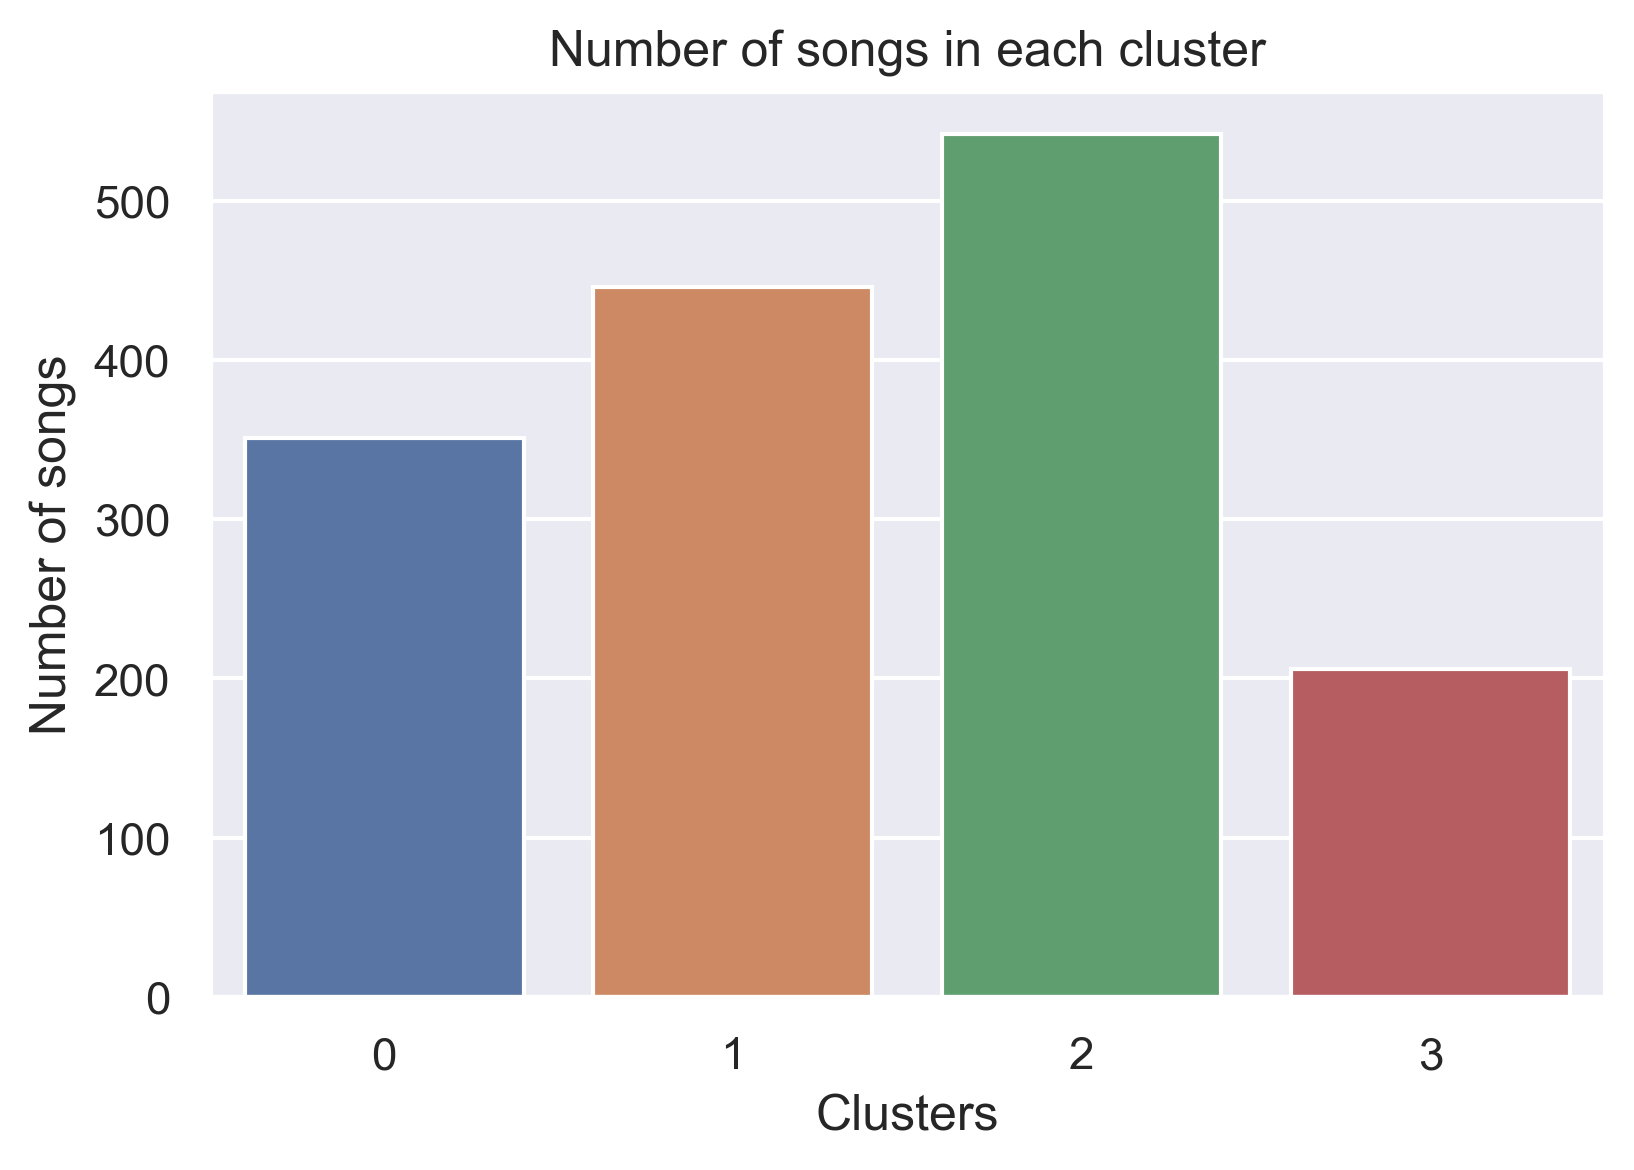

In [7]:
plt.figure(dpi=300)
sns.countplot(y)
plt.xlabel('Clusters')
plt.ylabel('Number of songs')
plt.title('Number of songs in each cluster')
plt.savefig('number.png')

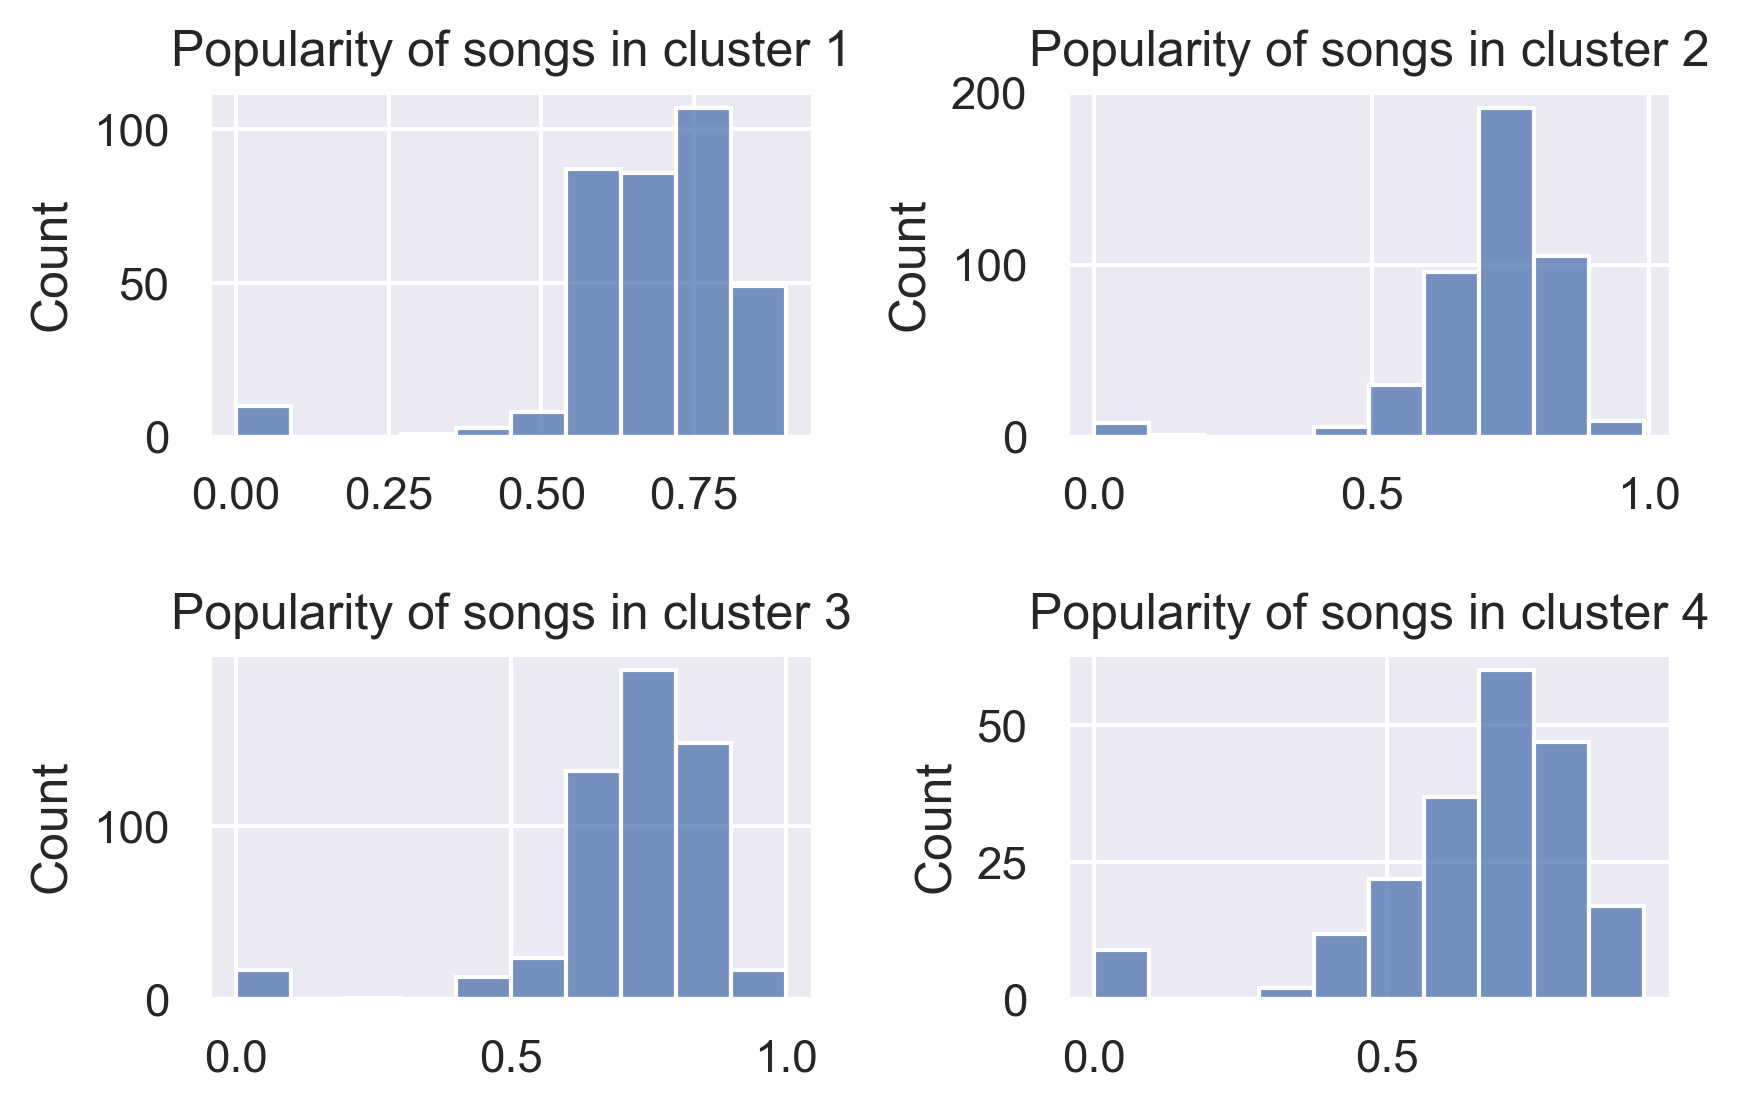

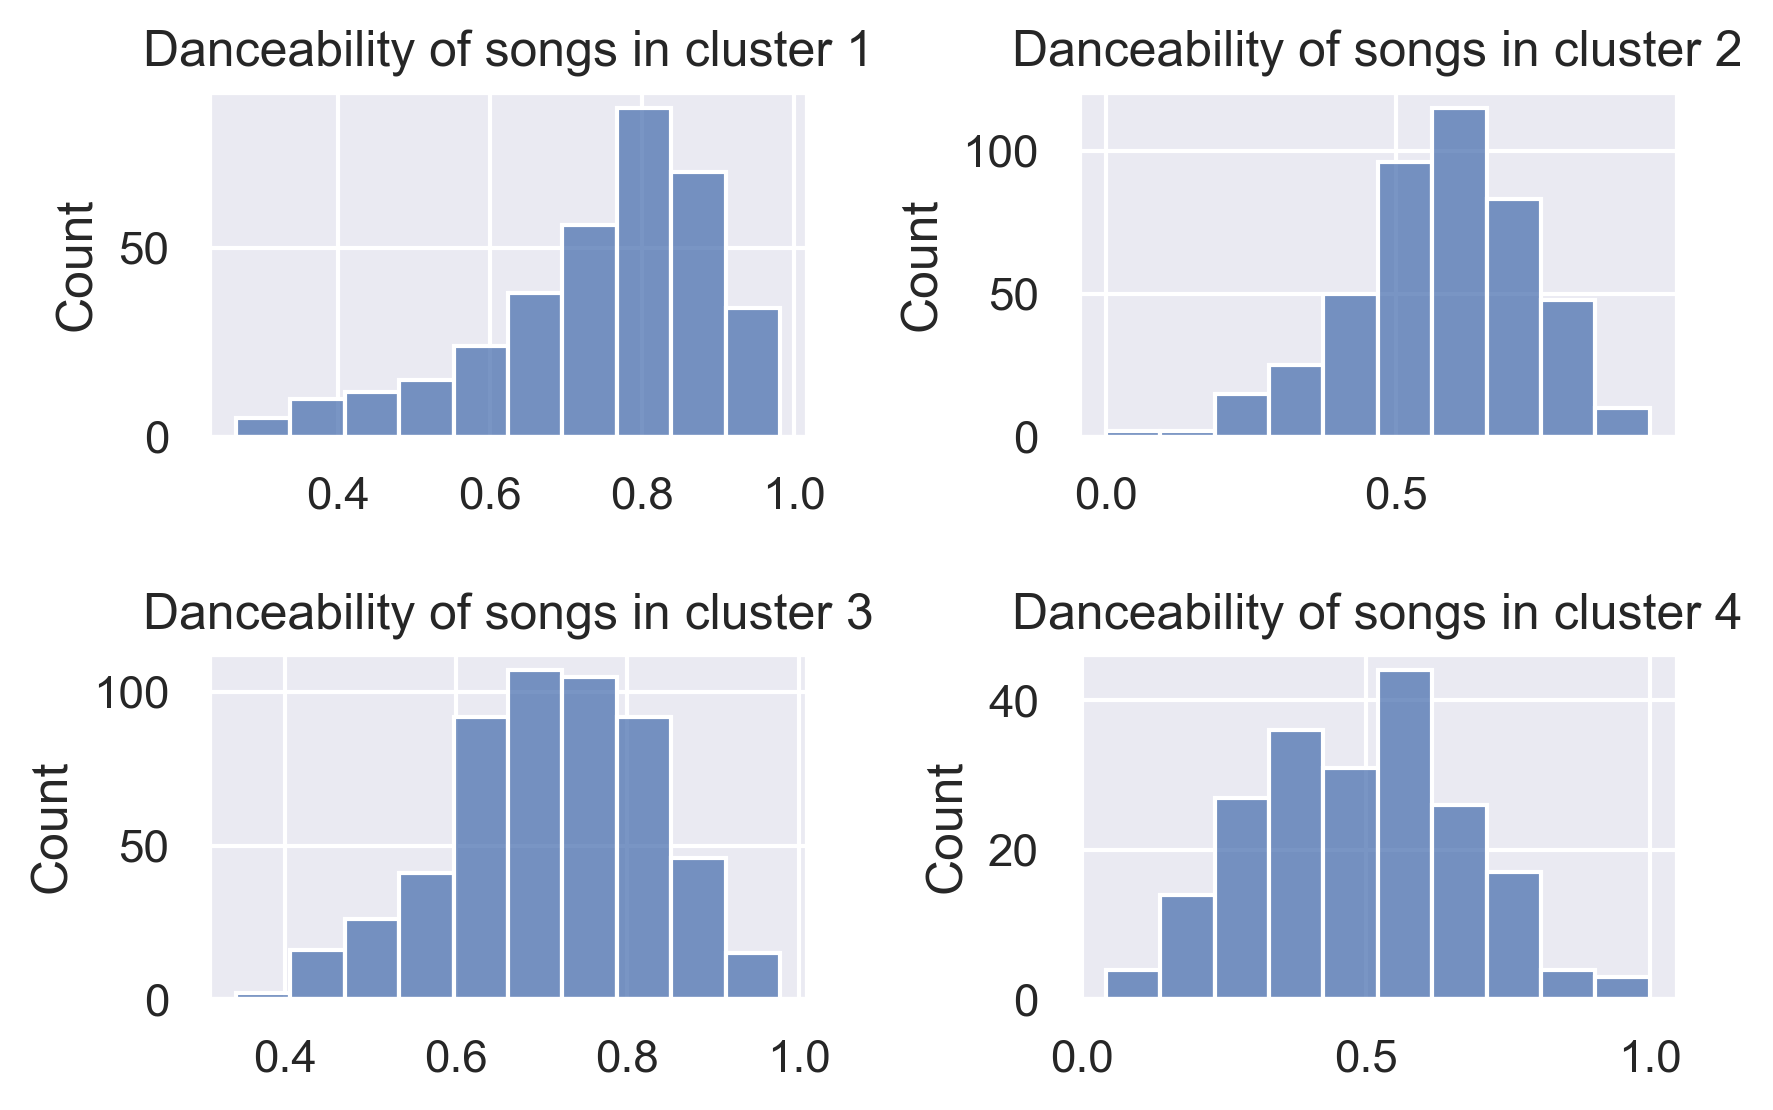

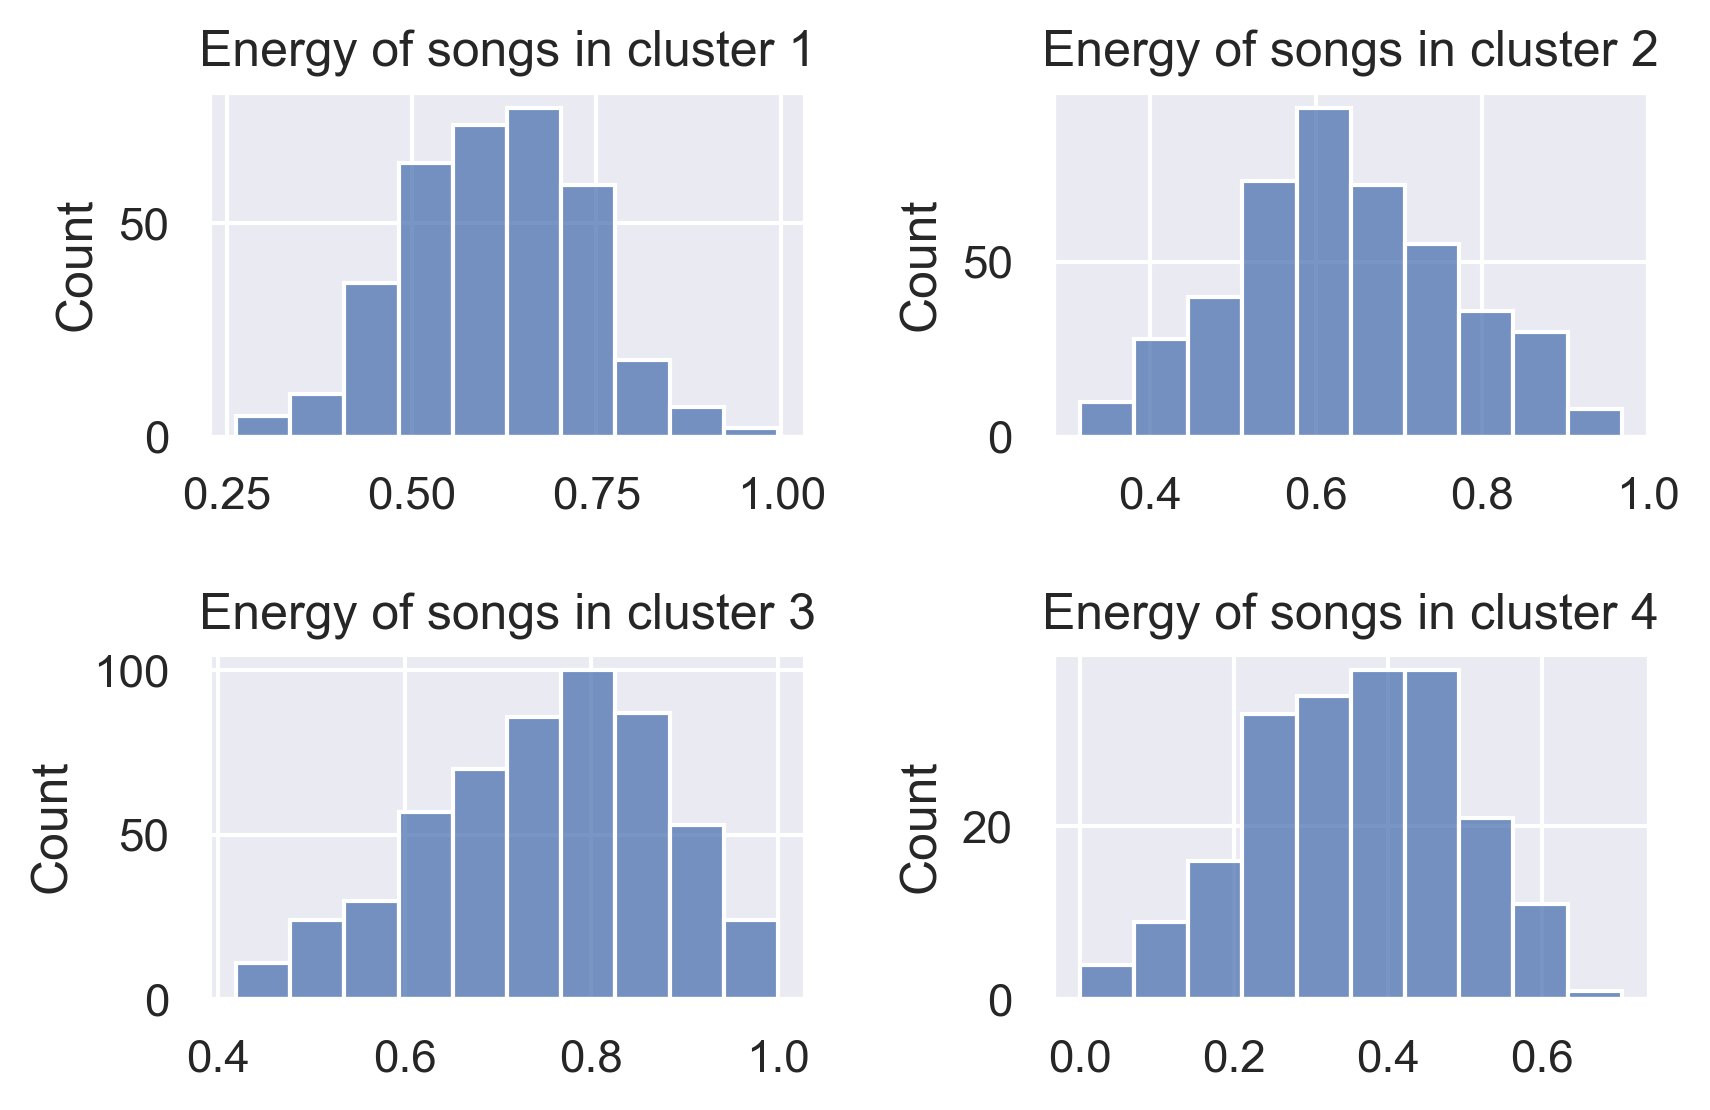

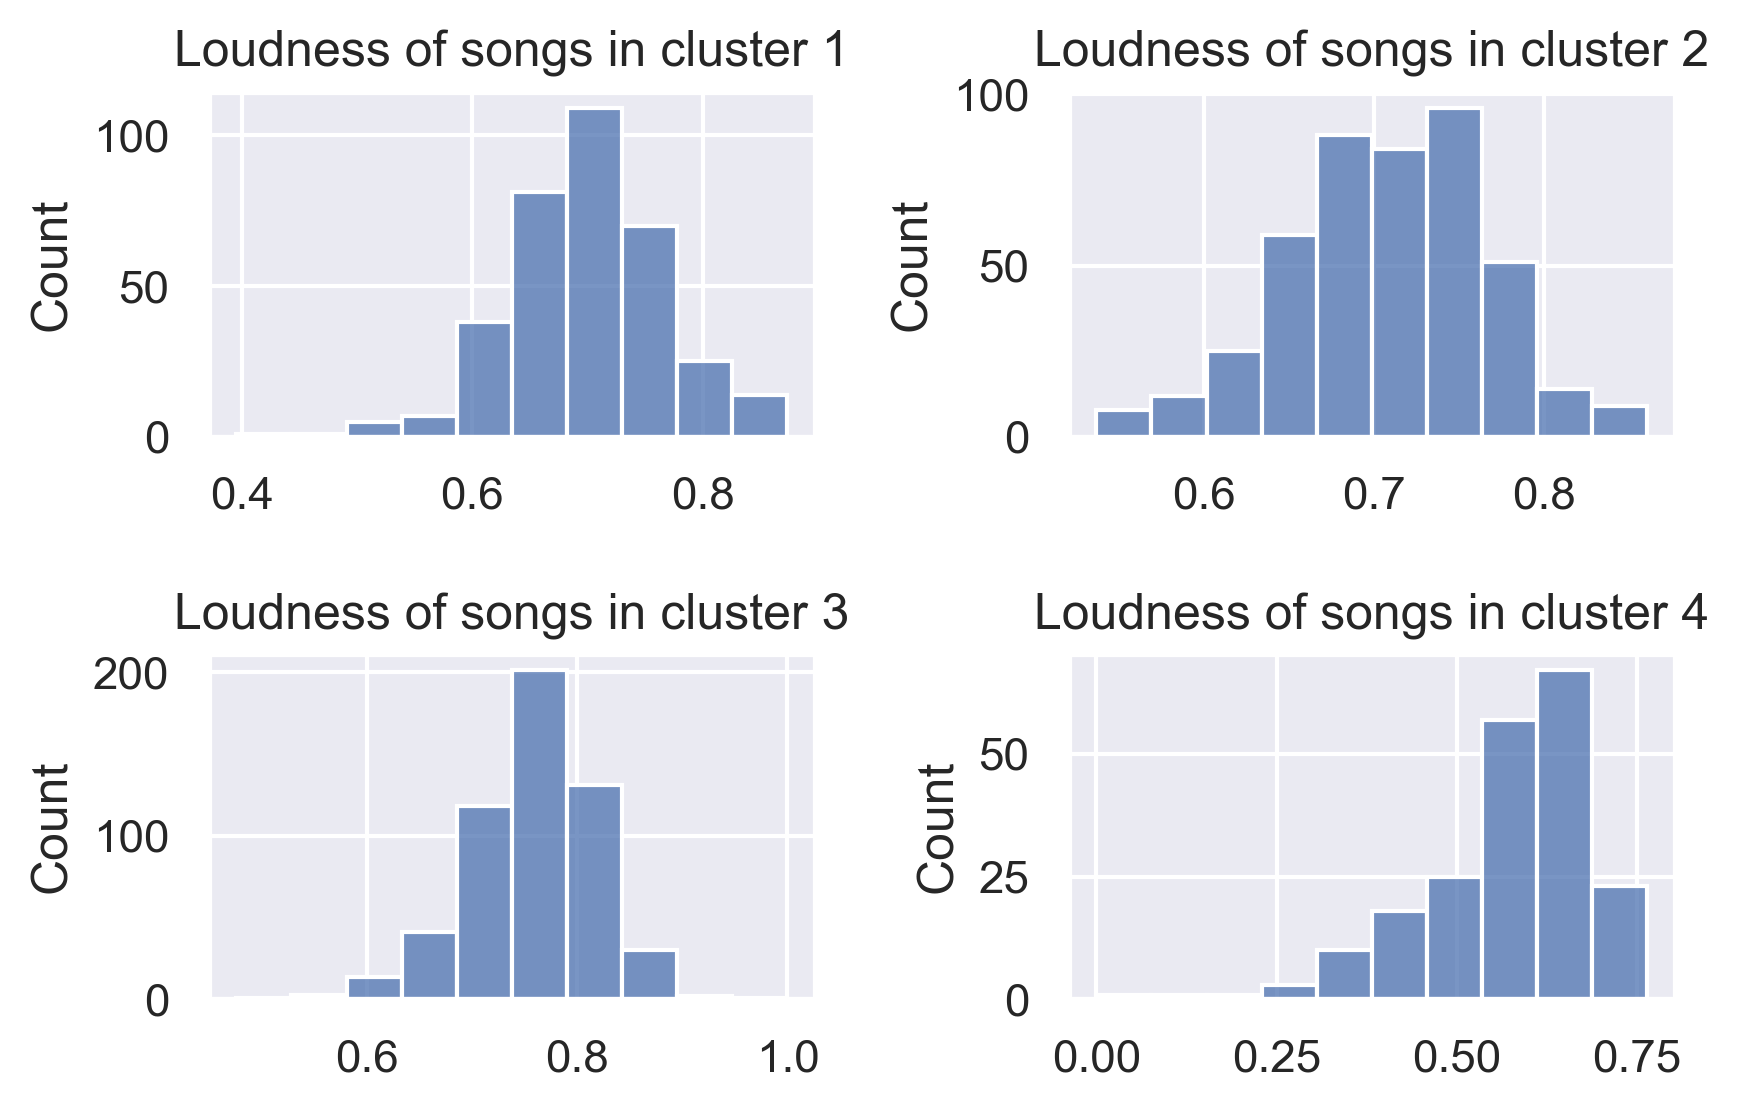

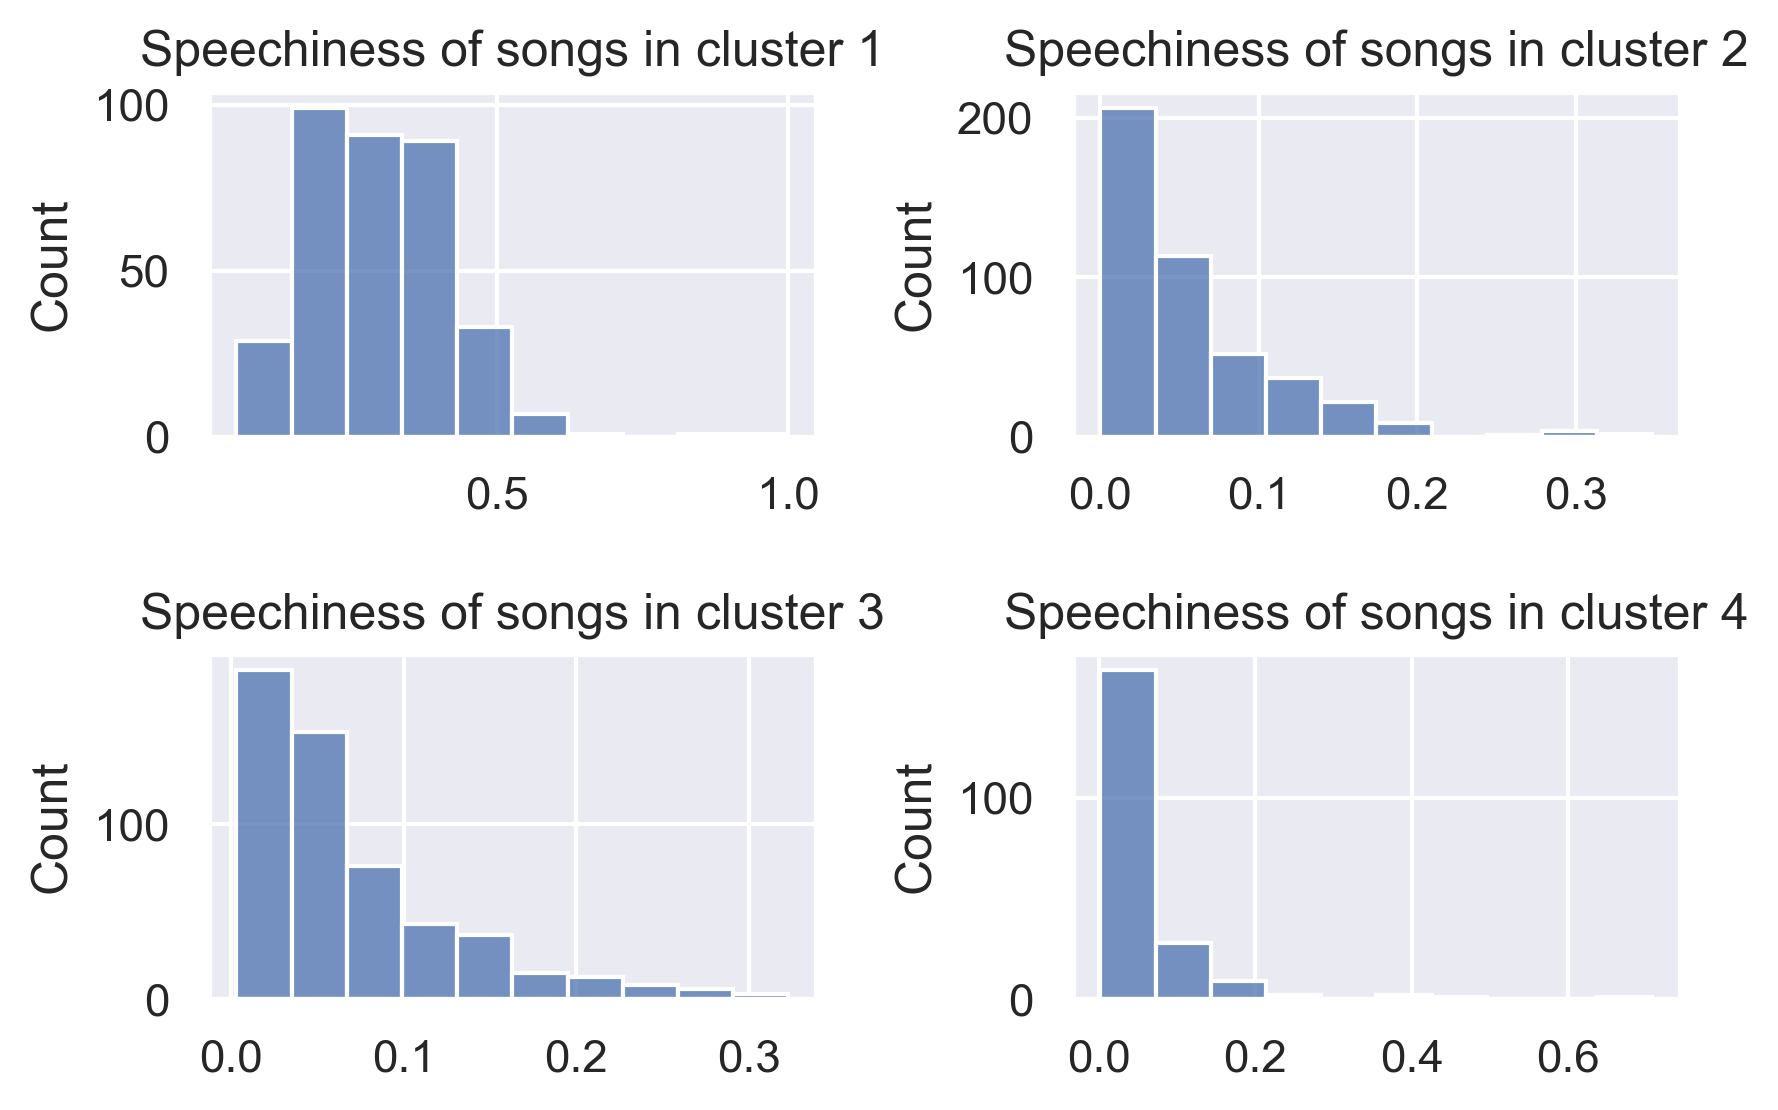

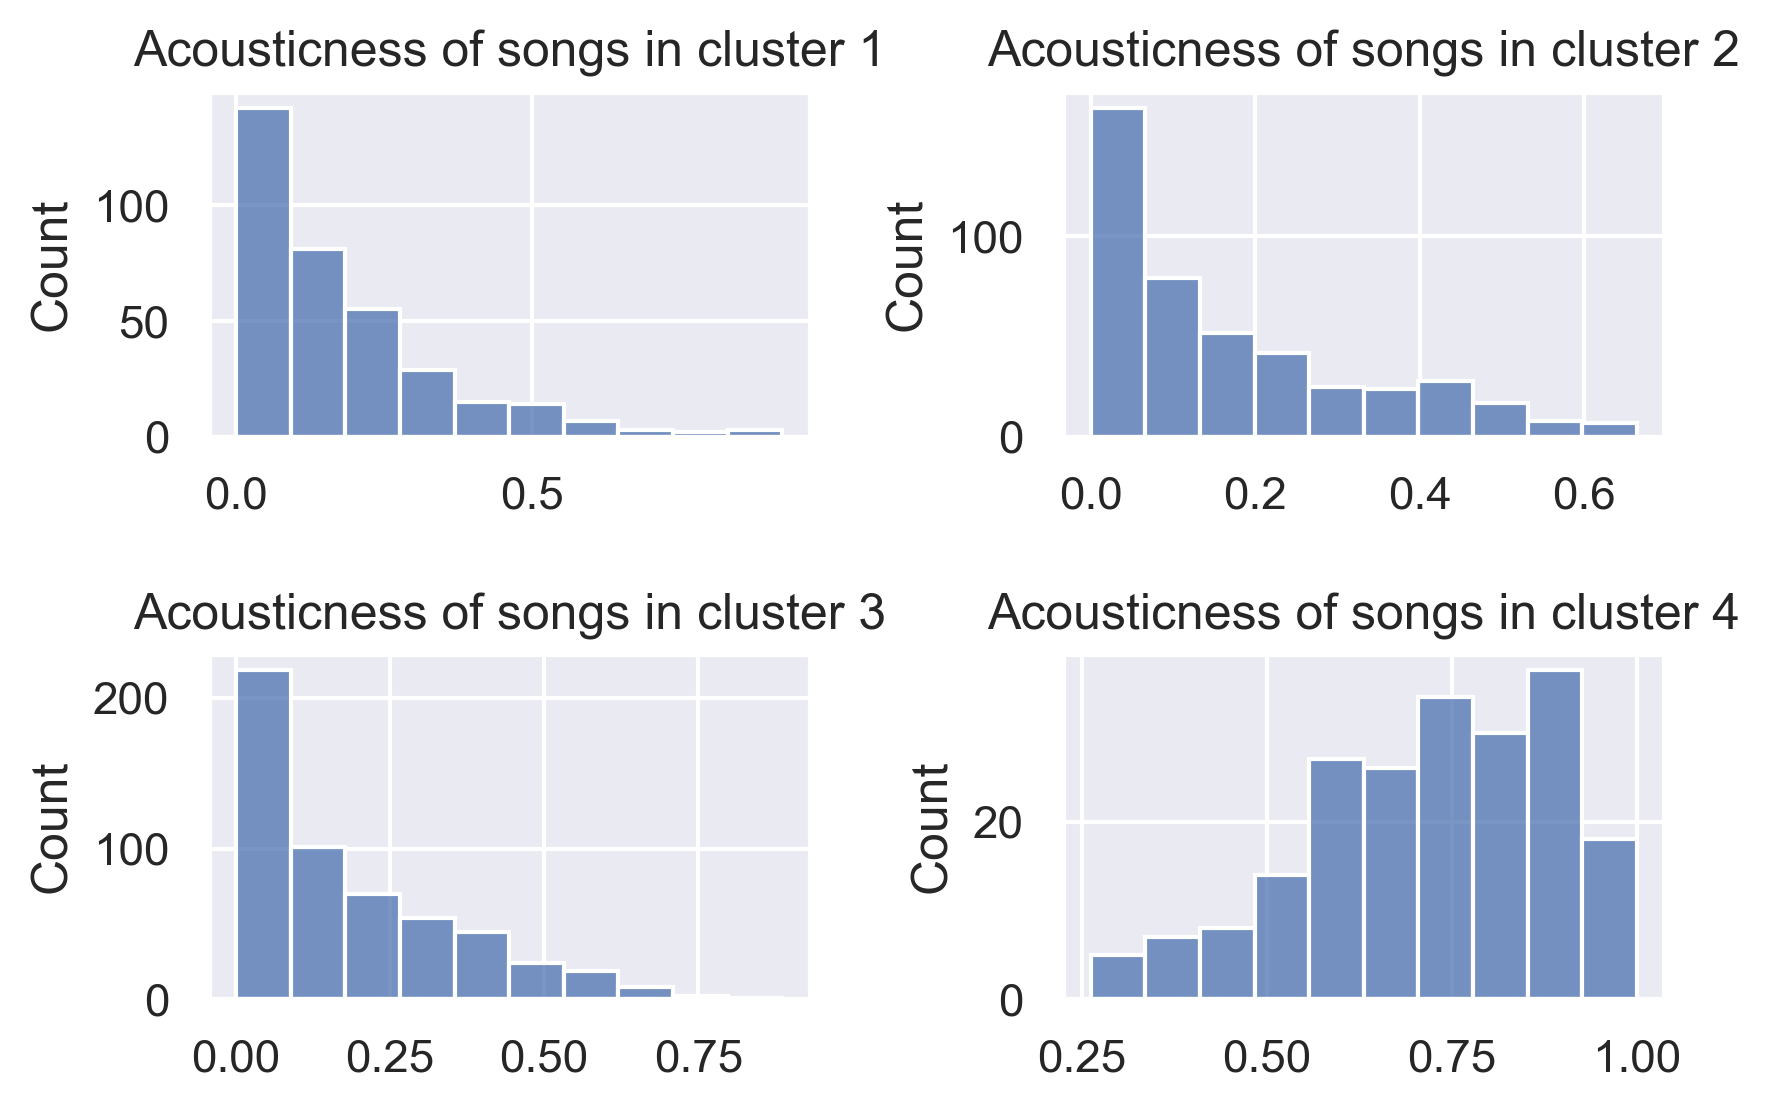

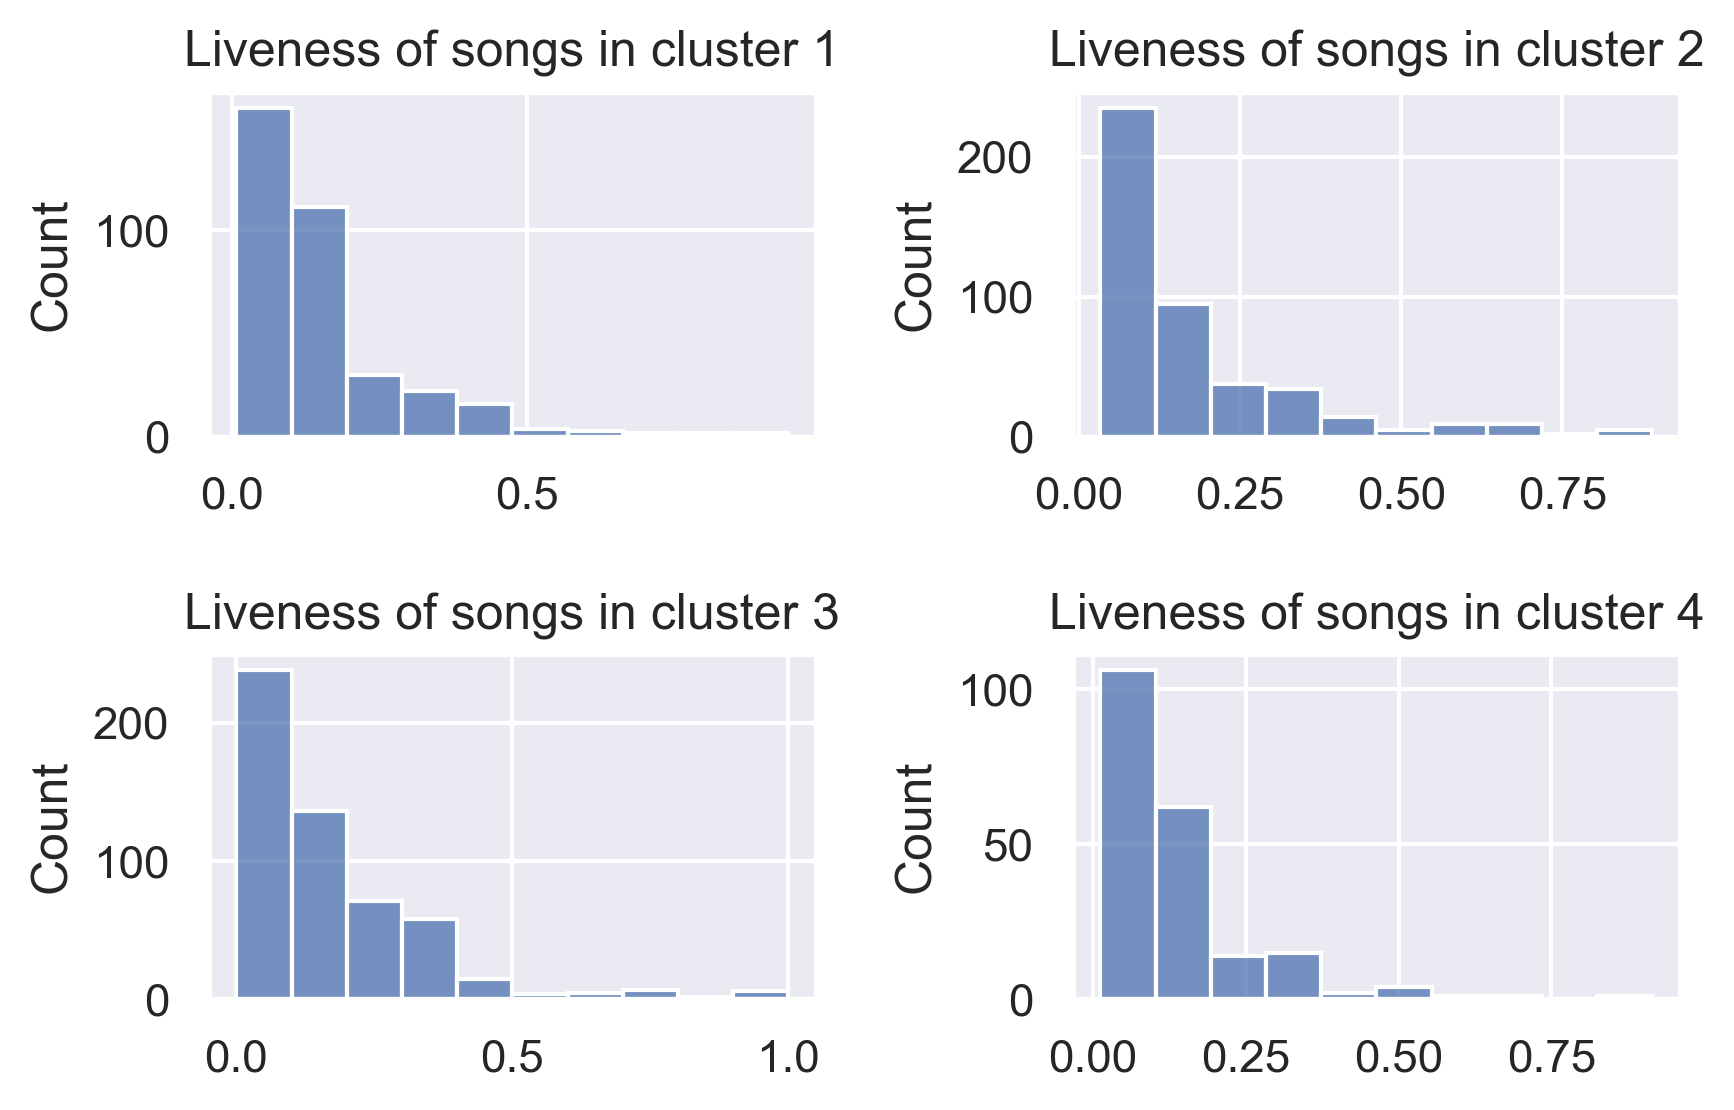

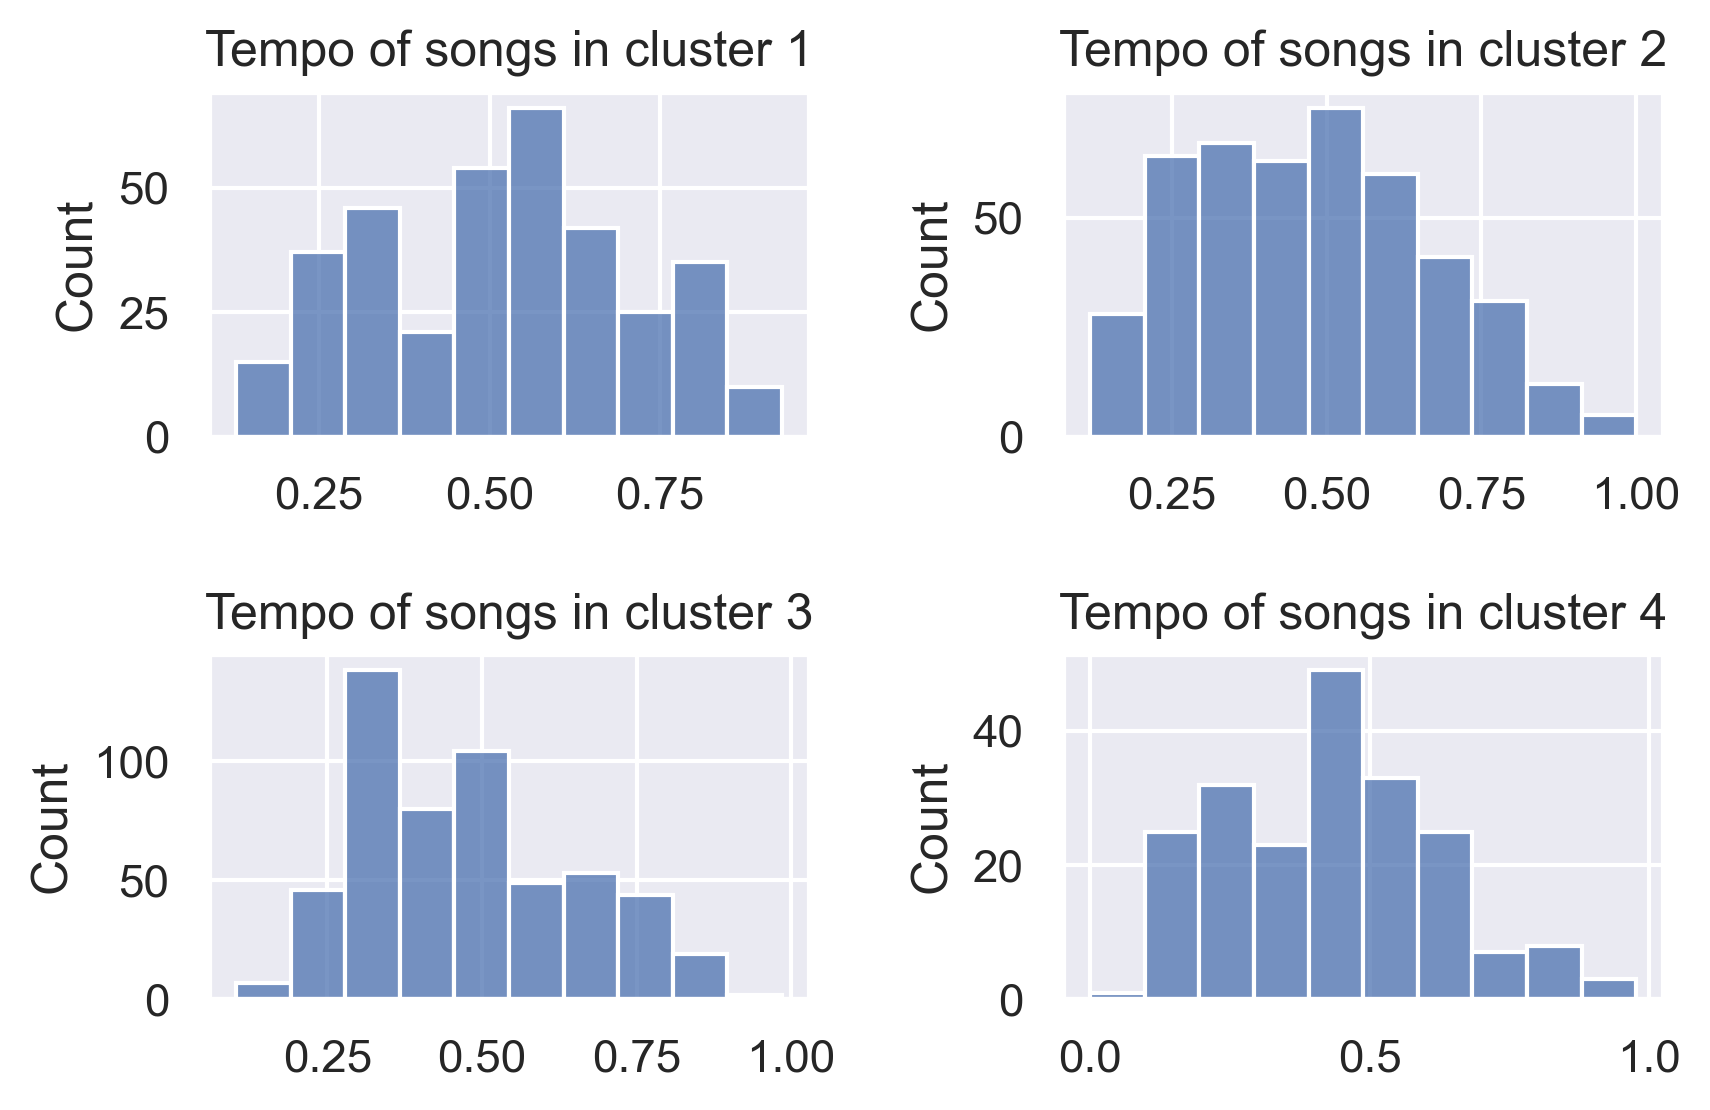

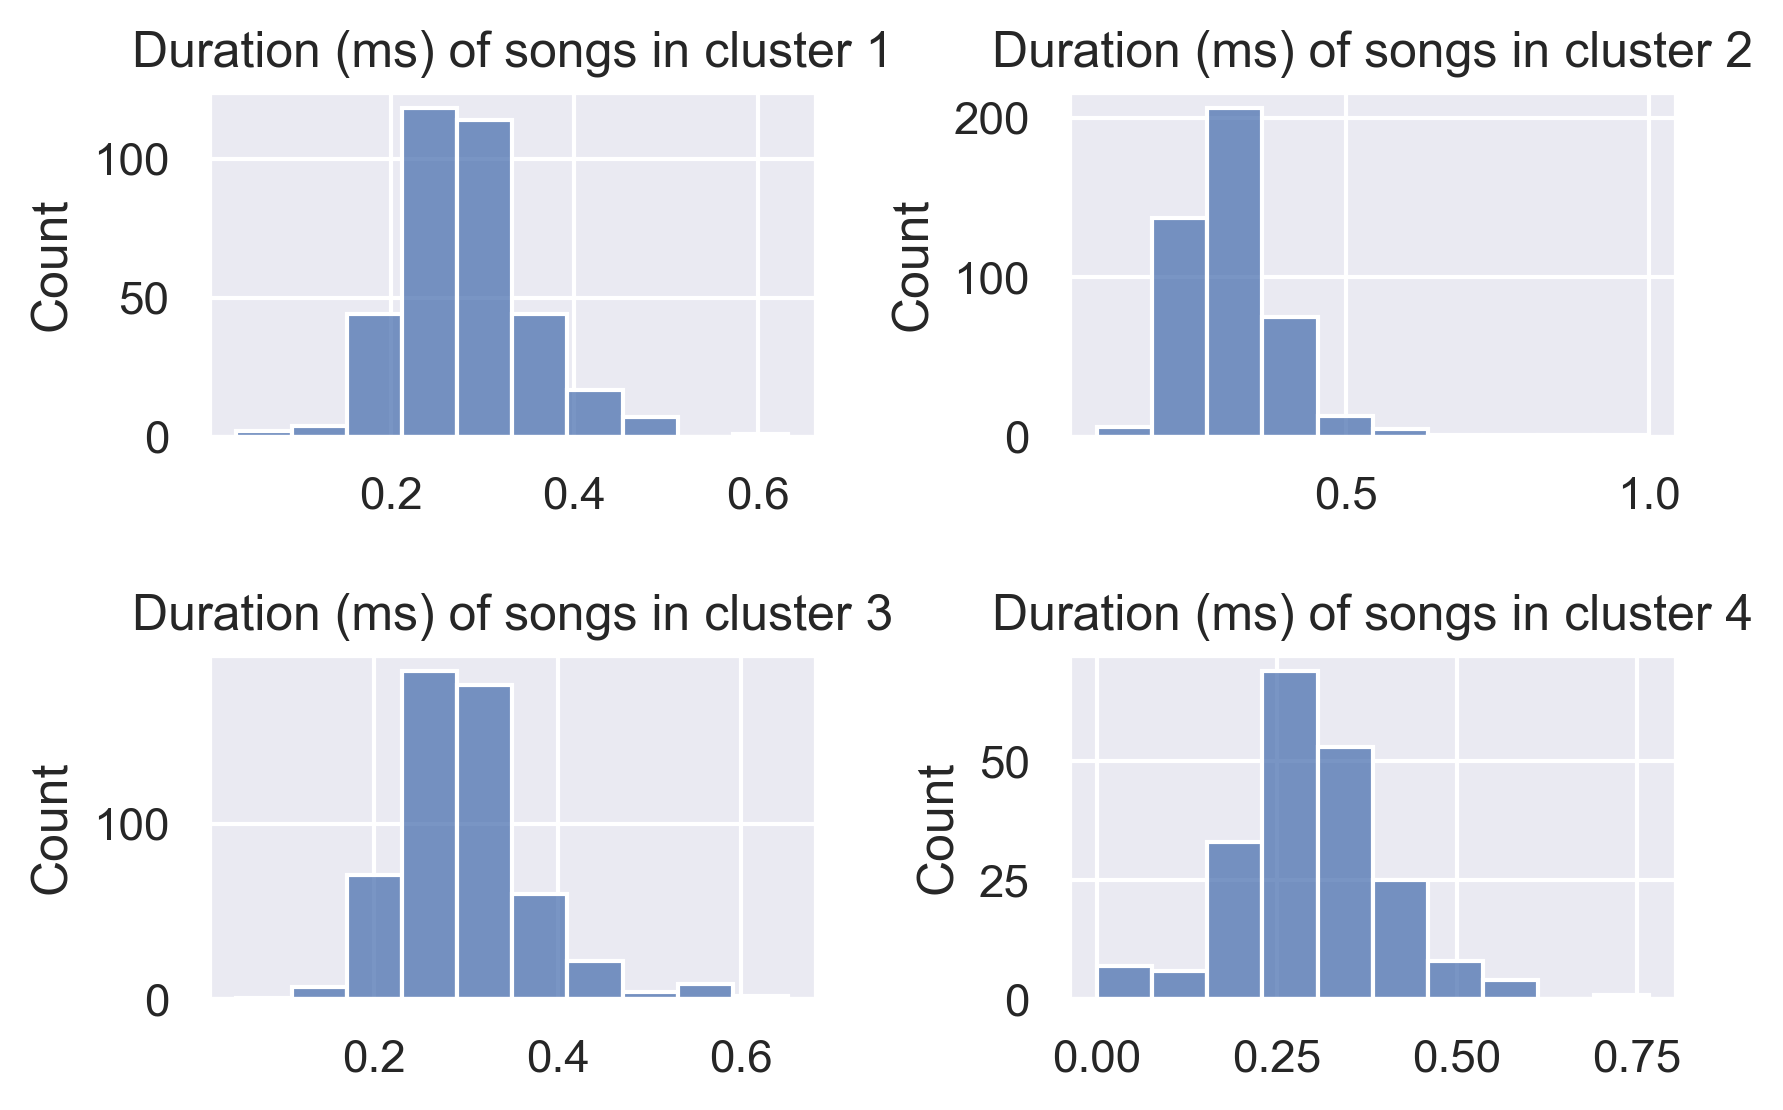

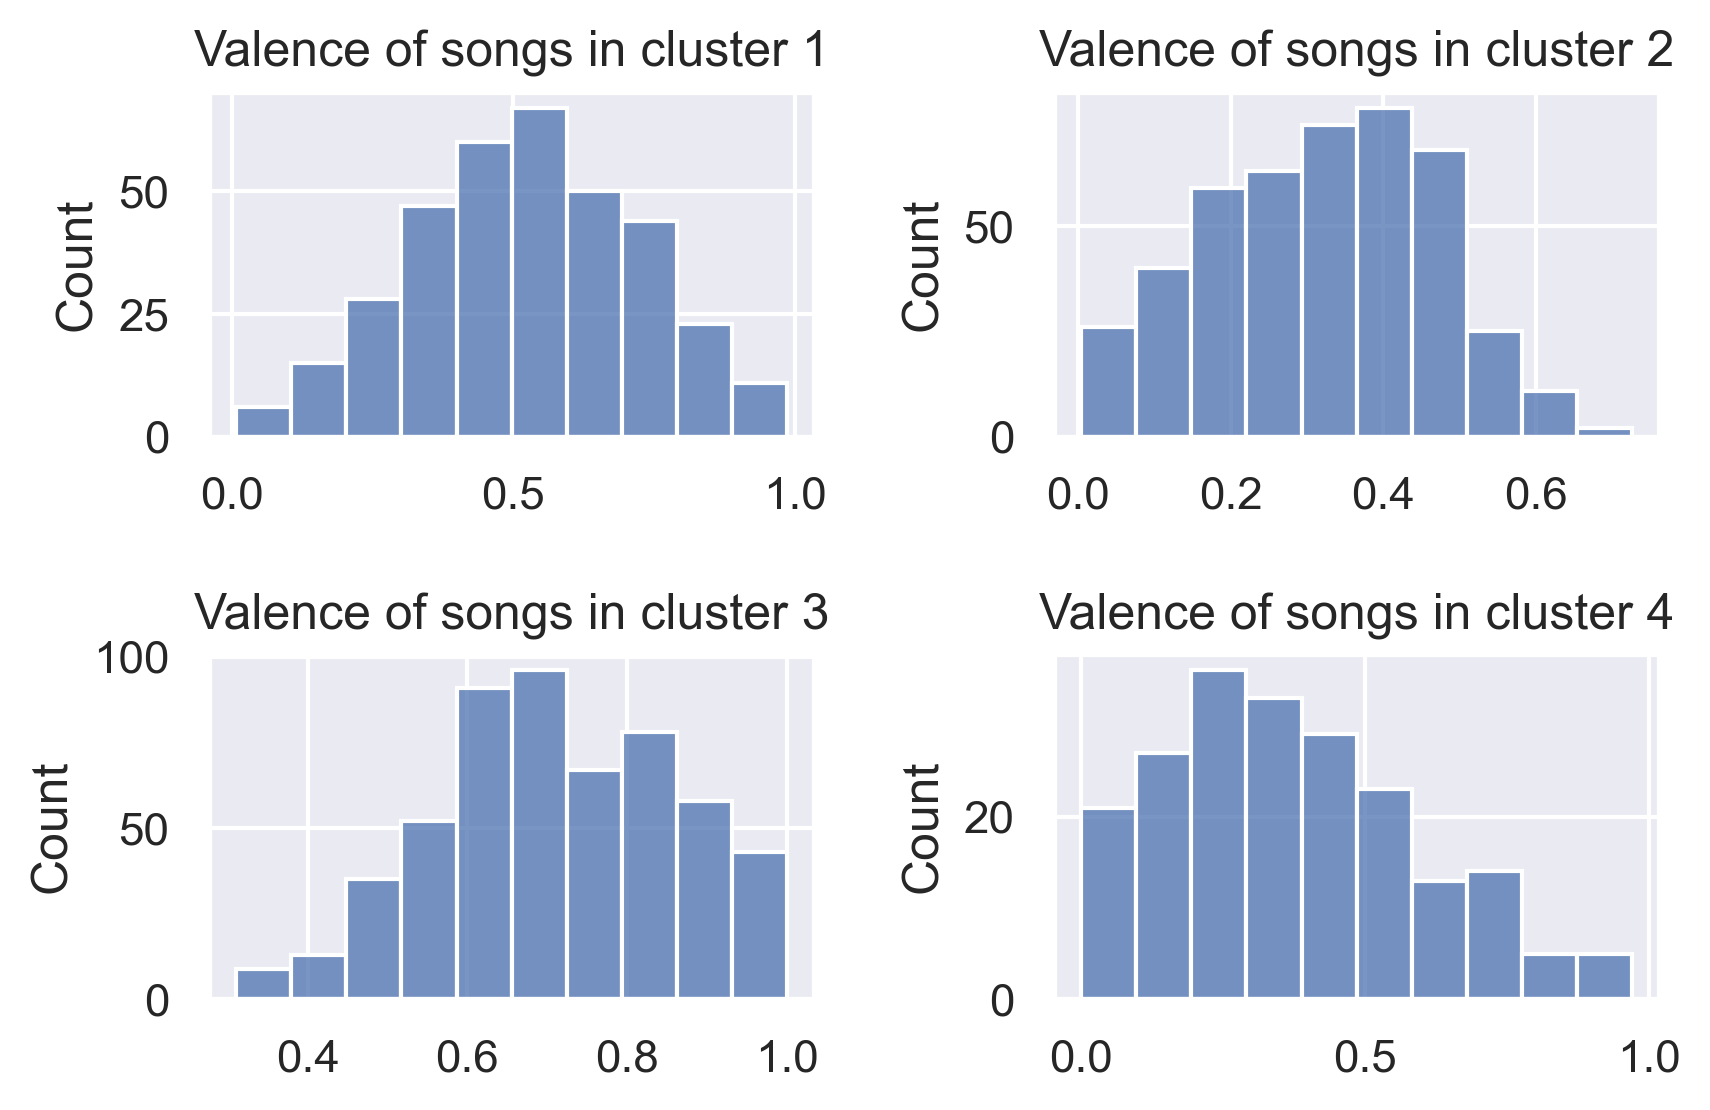

In [8]:
ddata = MinMaxScaler().fit_transform(df_std)

for i, name in enumerate(features):
    plt.figure(dpi=300)
    sub_data = ddata[:, i]
    
    plt.subplot(221)
    plt.title('{} of songs in cluster 1'.format(name))
    sns.histplot(sub_data[y==0], bins=10)
    
    
    plt.subplot(222)
    plt.title('{} of songs in cluster 2'.format(name))
    sns.histplot(sub_data[y==1], bins=10)
    
    plt.subplot(223)
    sns.histplot(sub_data[y==2], bins=10)
    plt.title('{} of songs in cluster 3'.format(name))
    
    plt.subplot(224)
    plt.title('{} of songs in cluster 4'.format(name))
    sns.histplot(sub_data[y==3], bins=10)
    
    plt.tight_layout(1.5)
    plt.savefig('{}.png'.format(name))

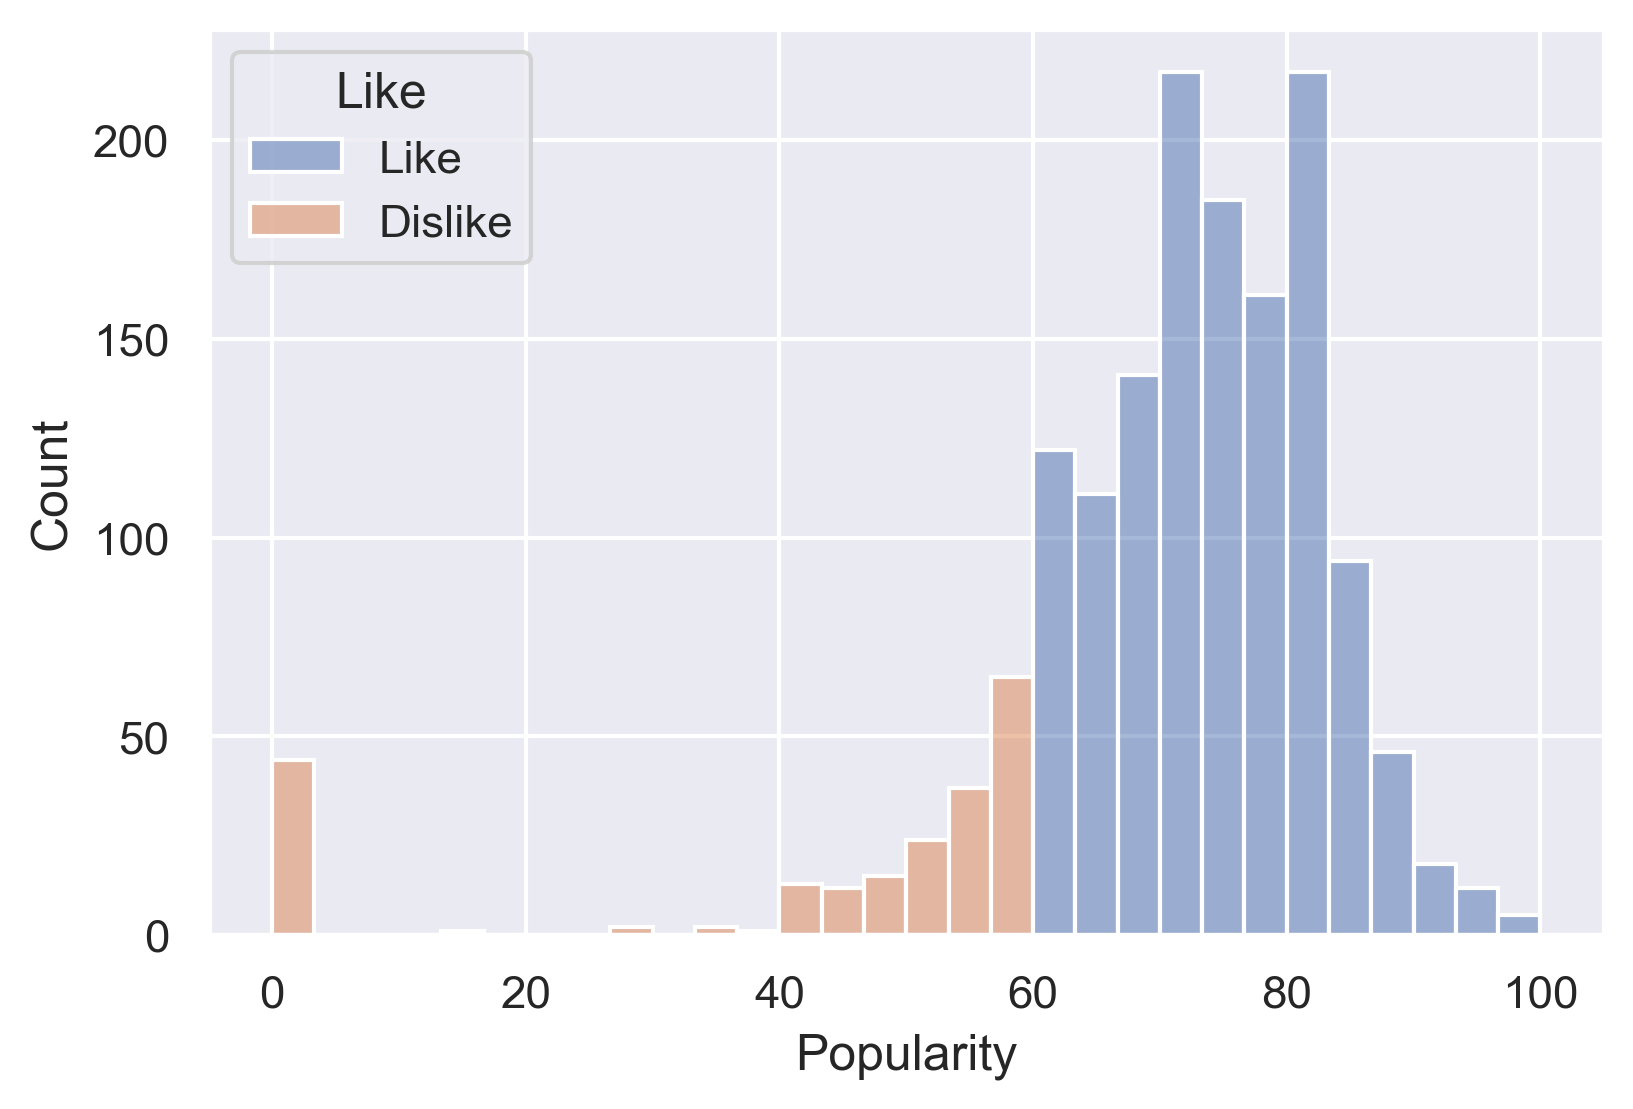

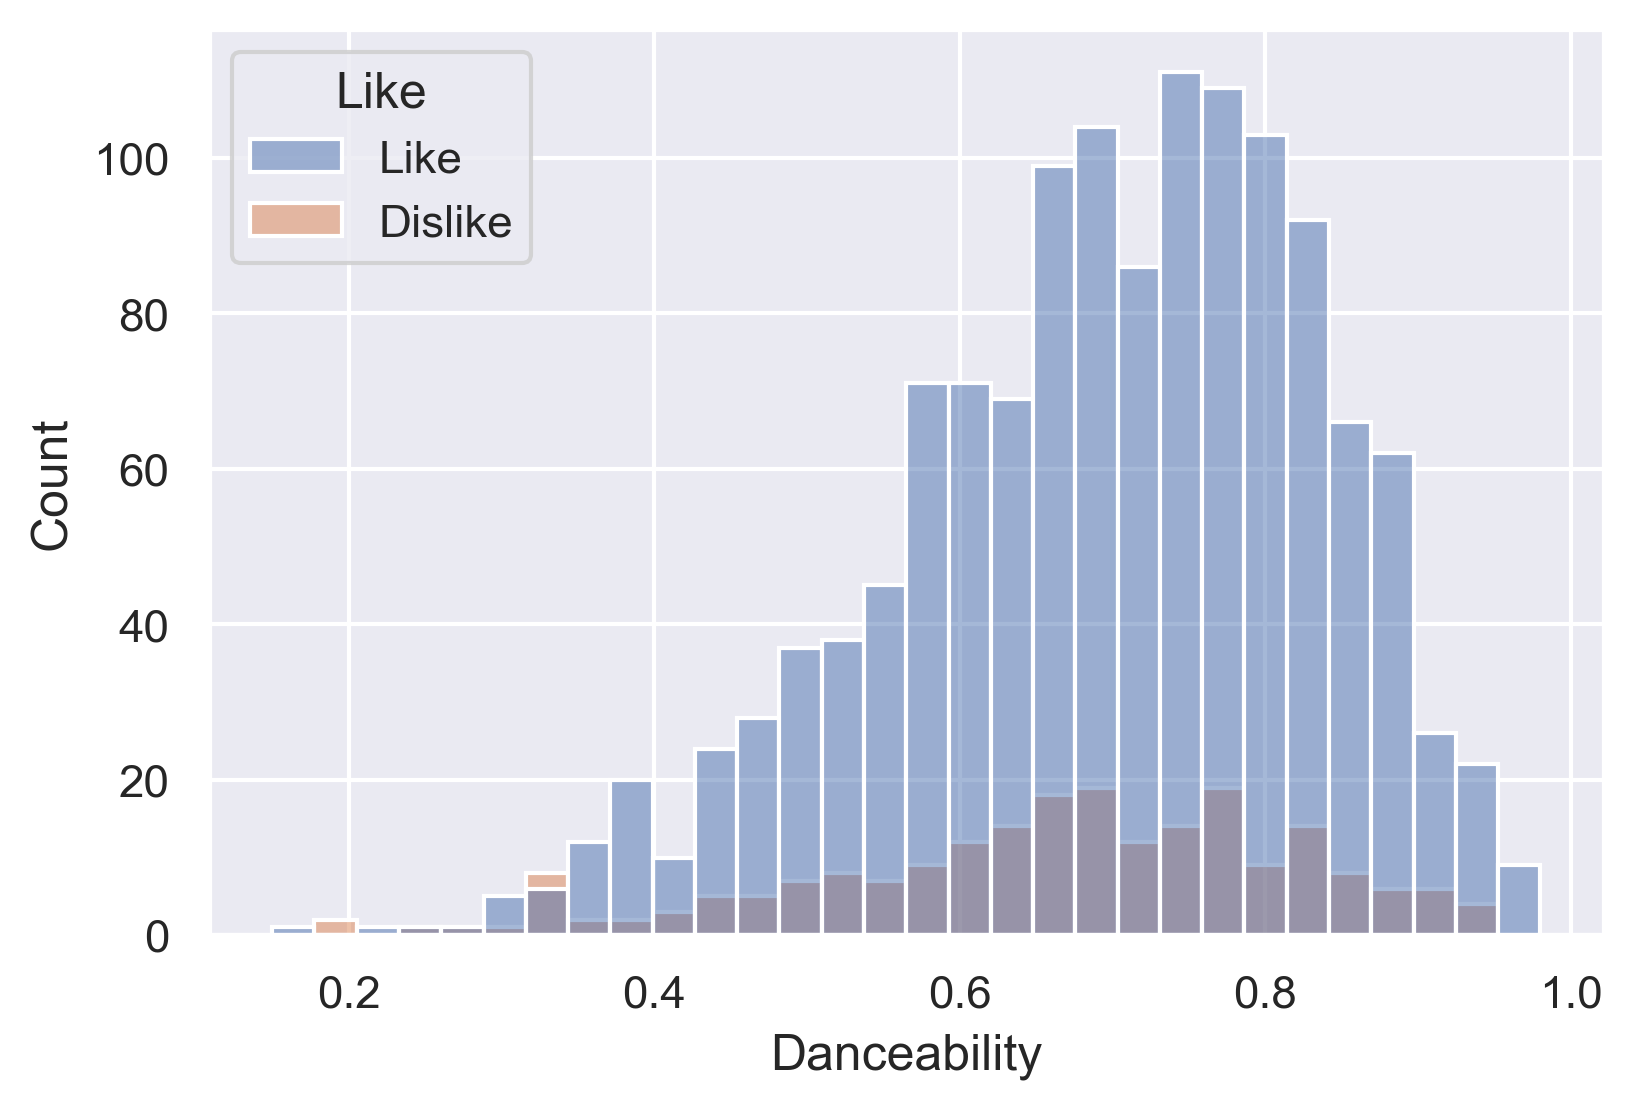

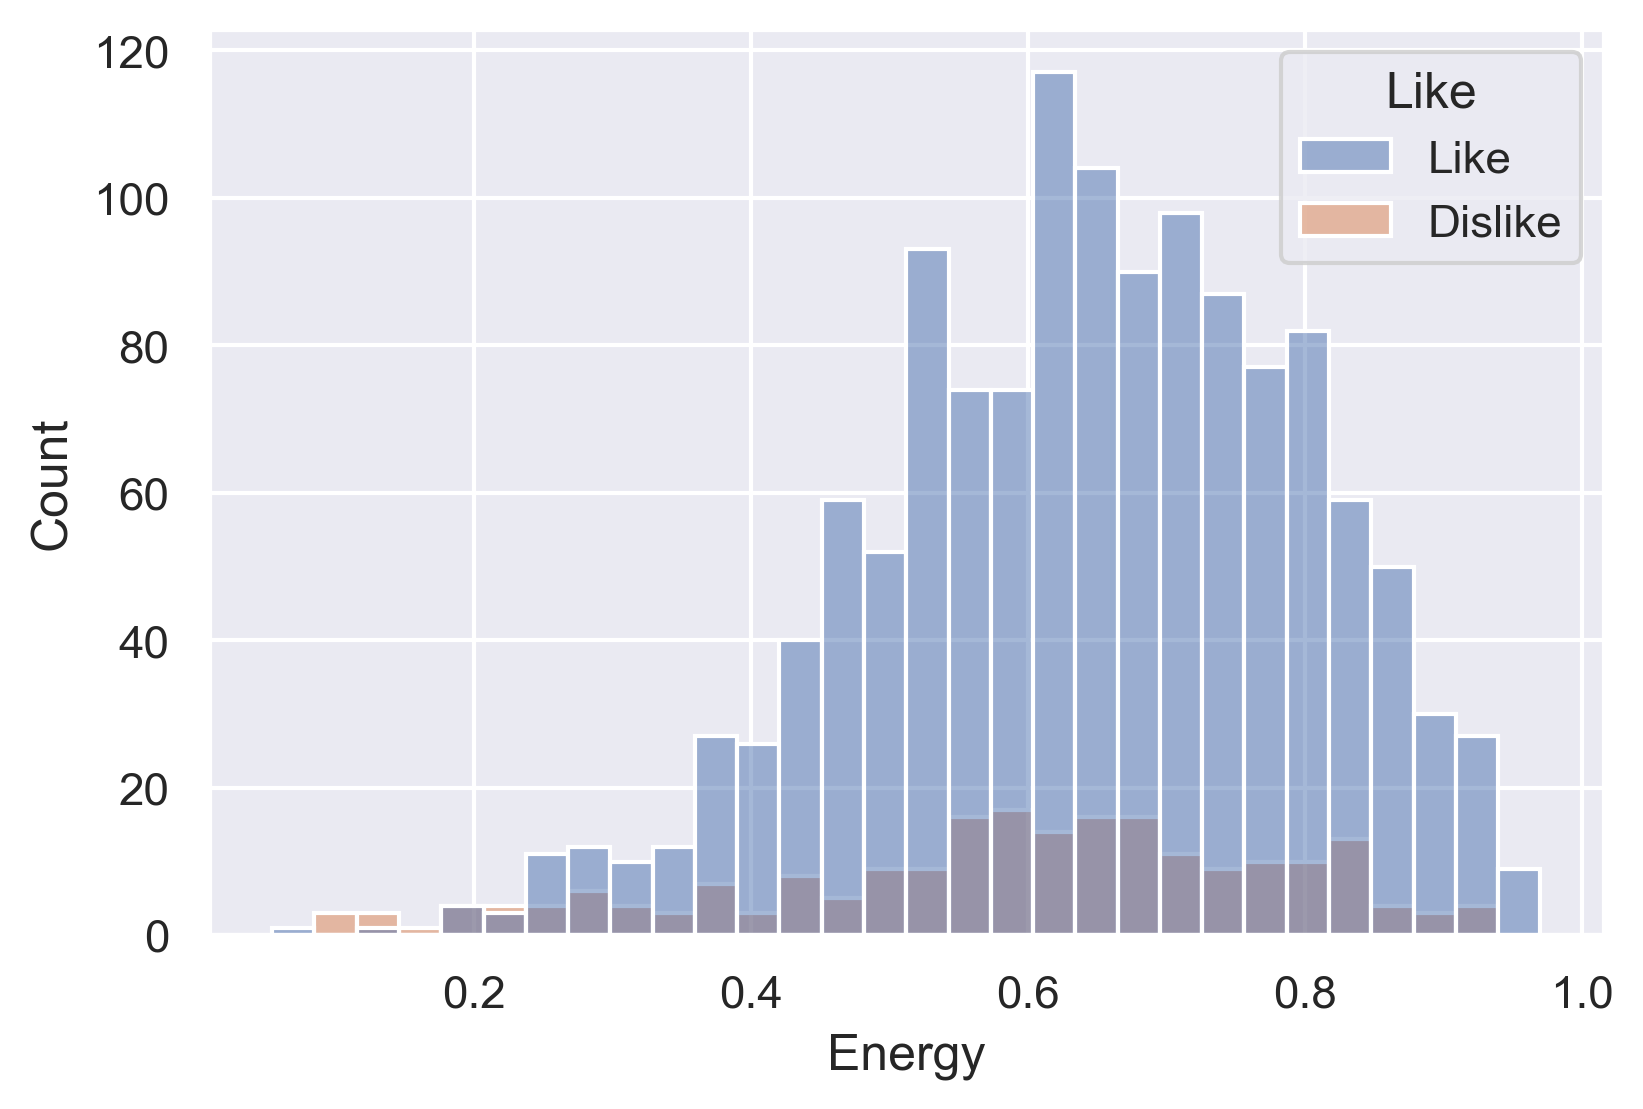

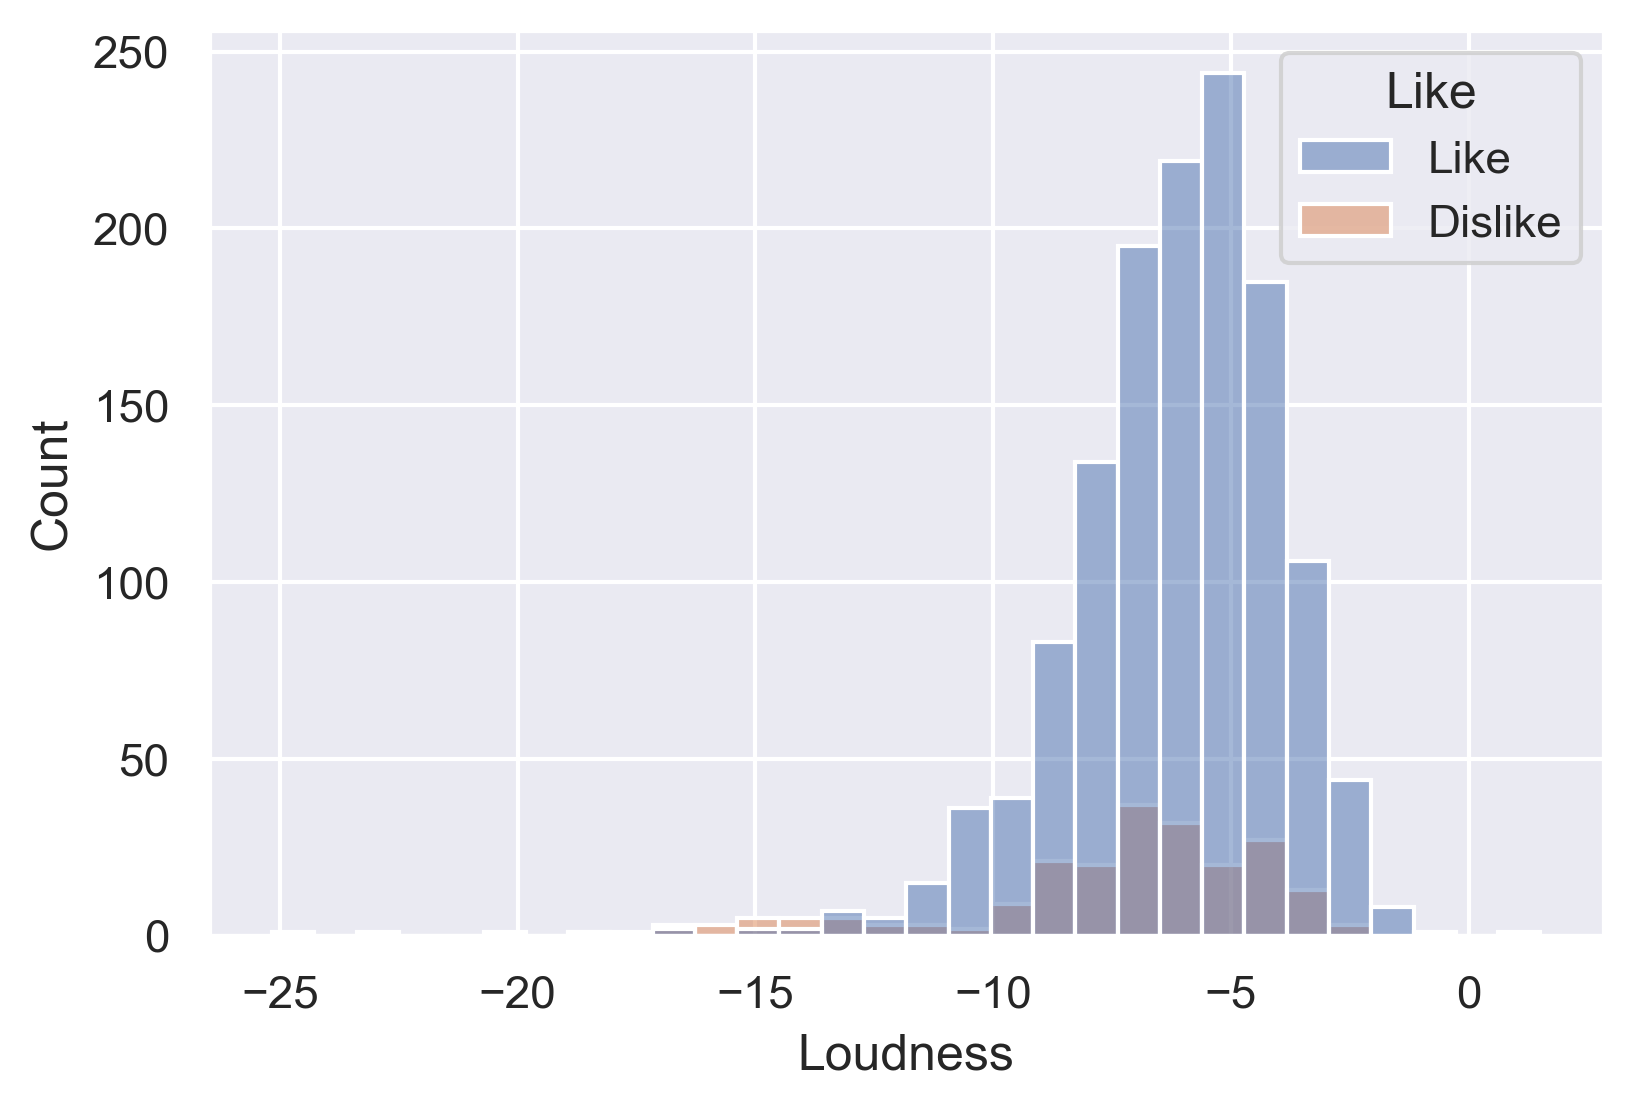

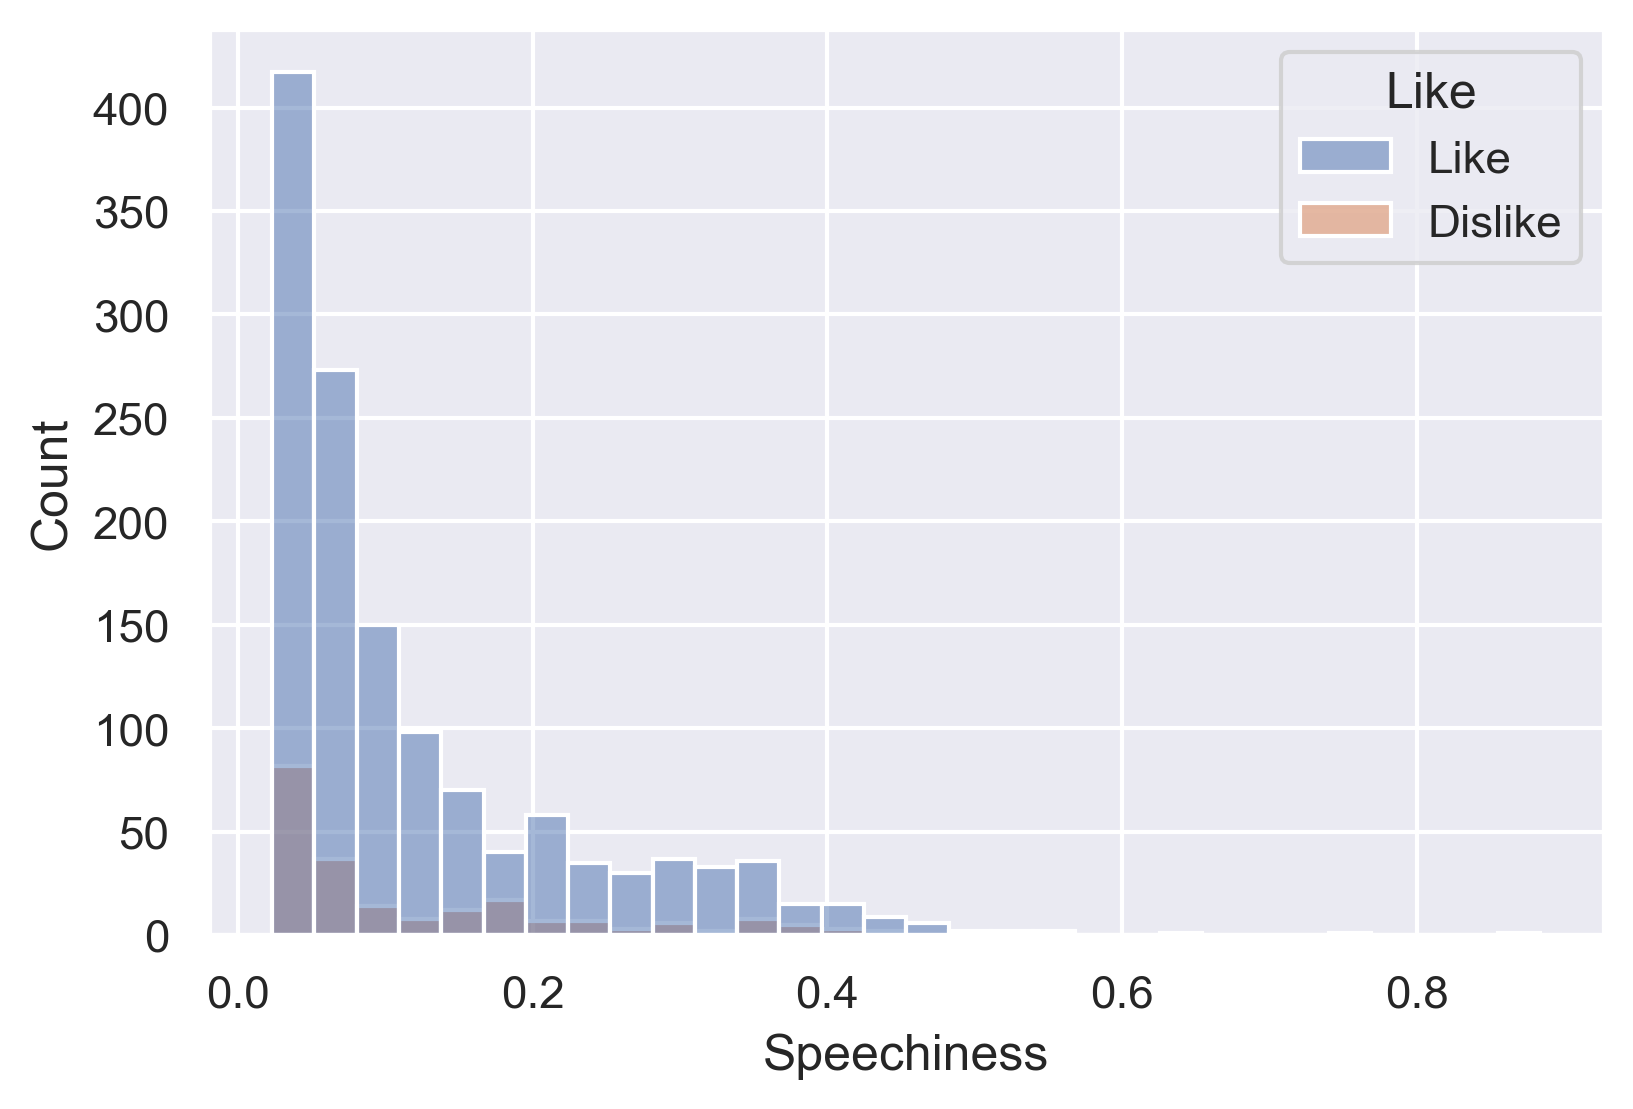

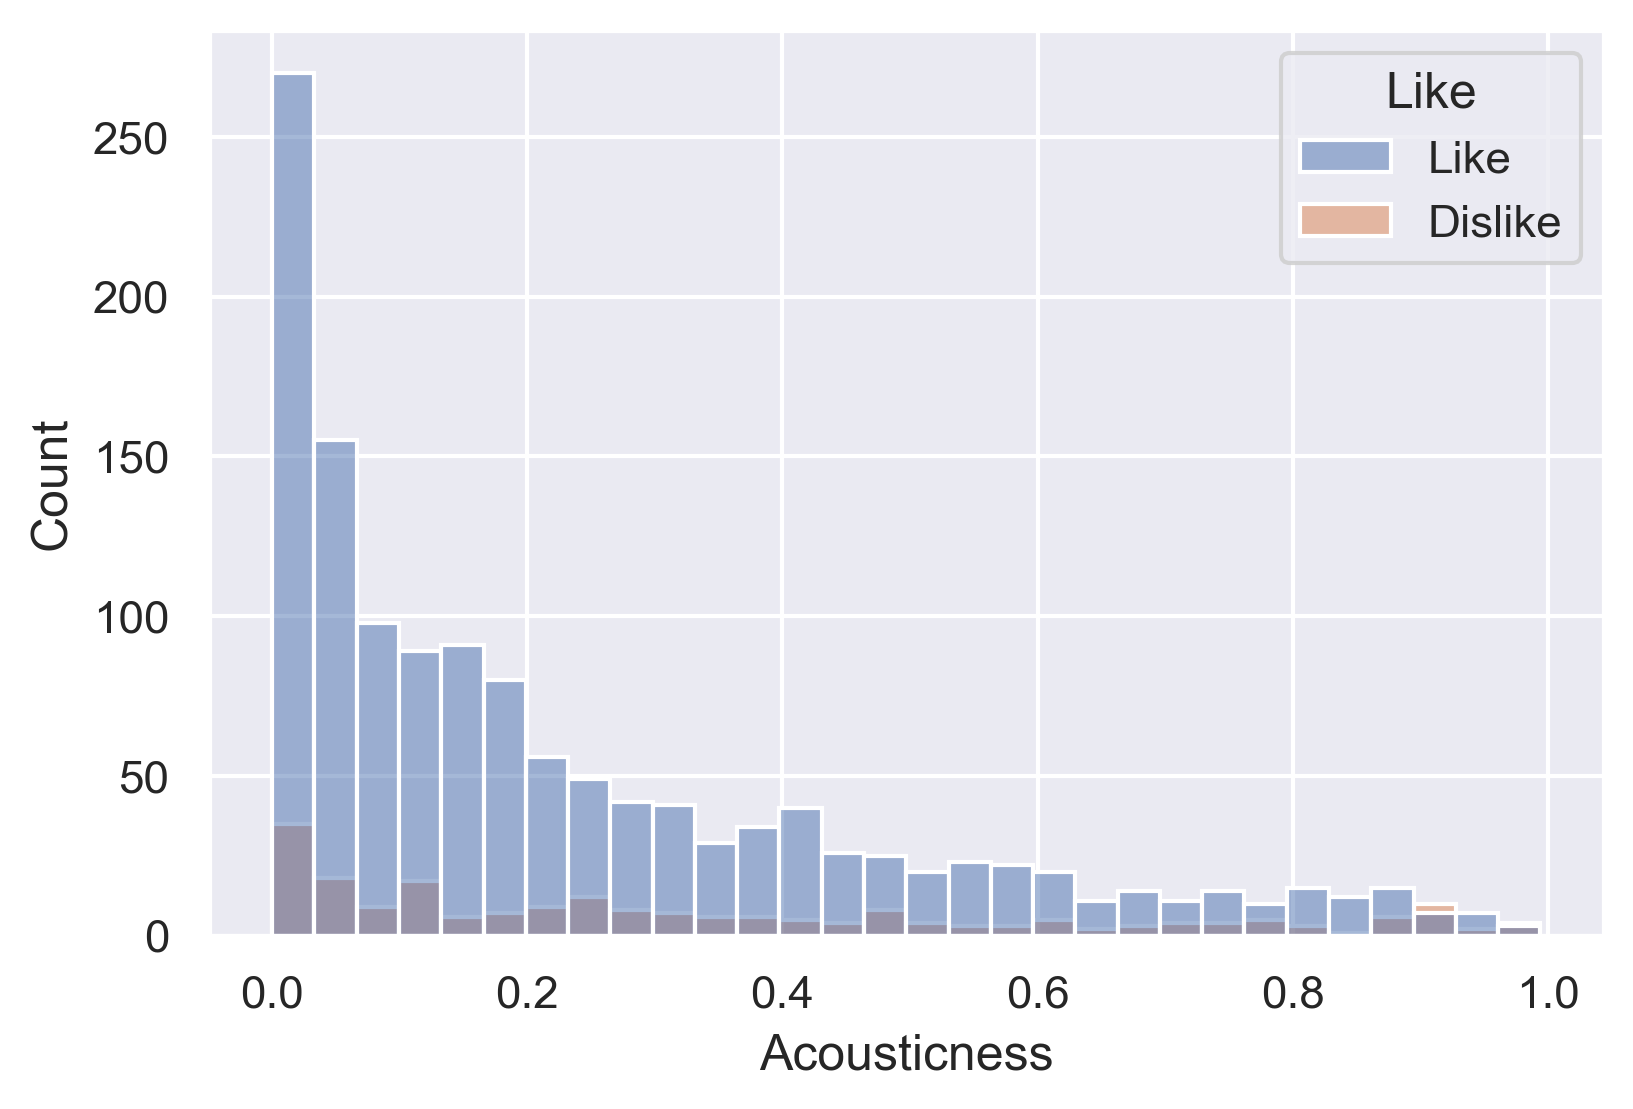

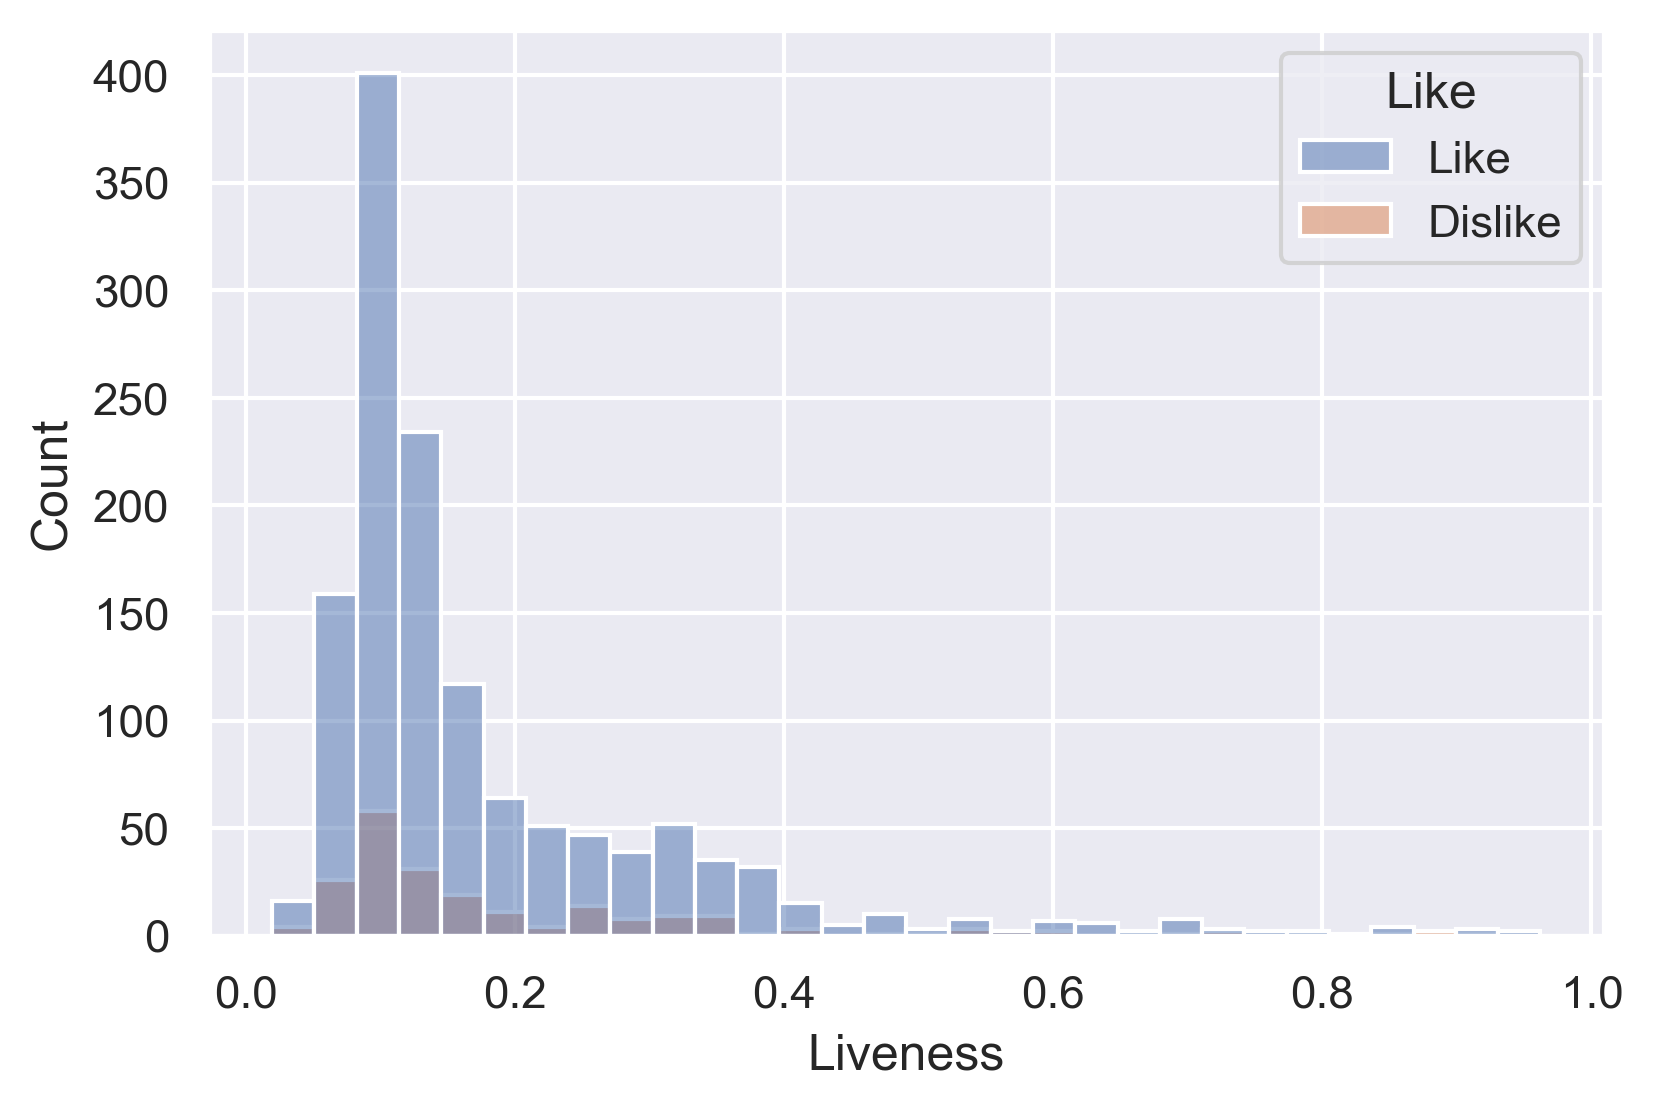

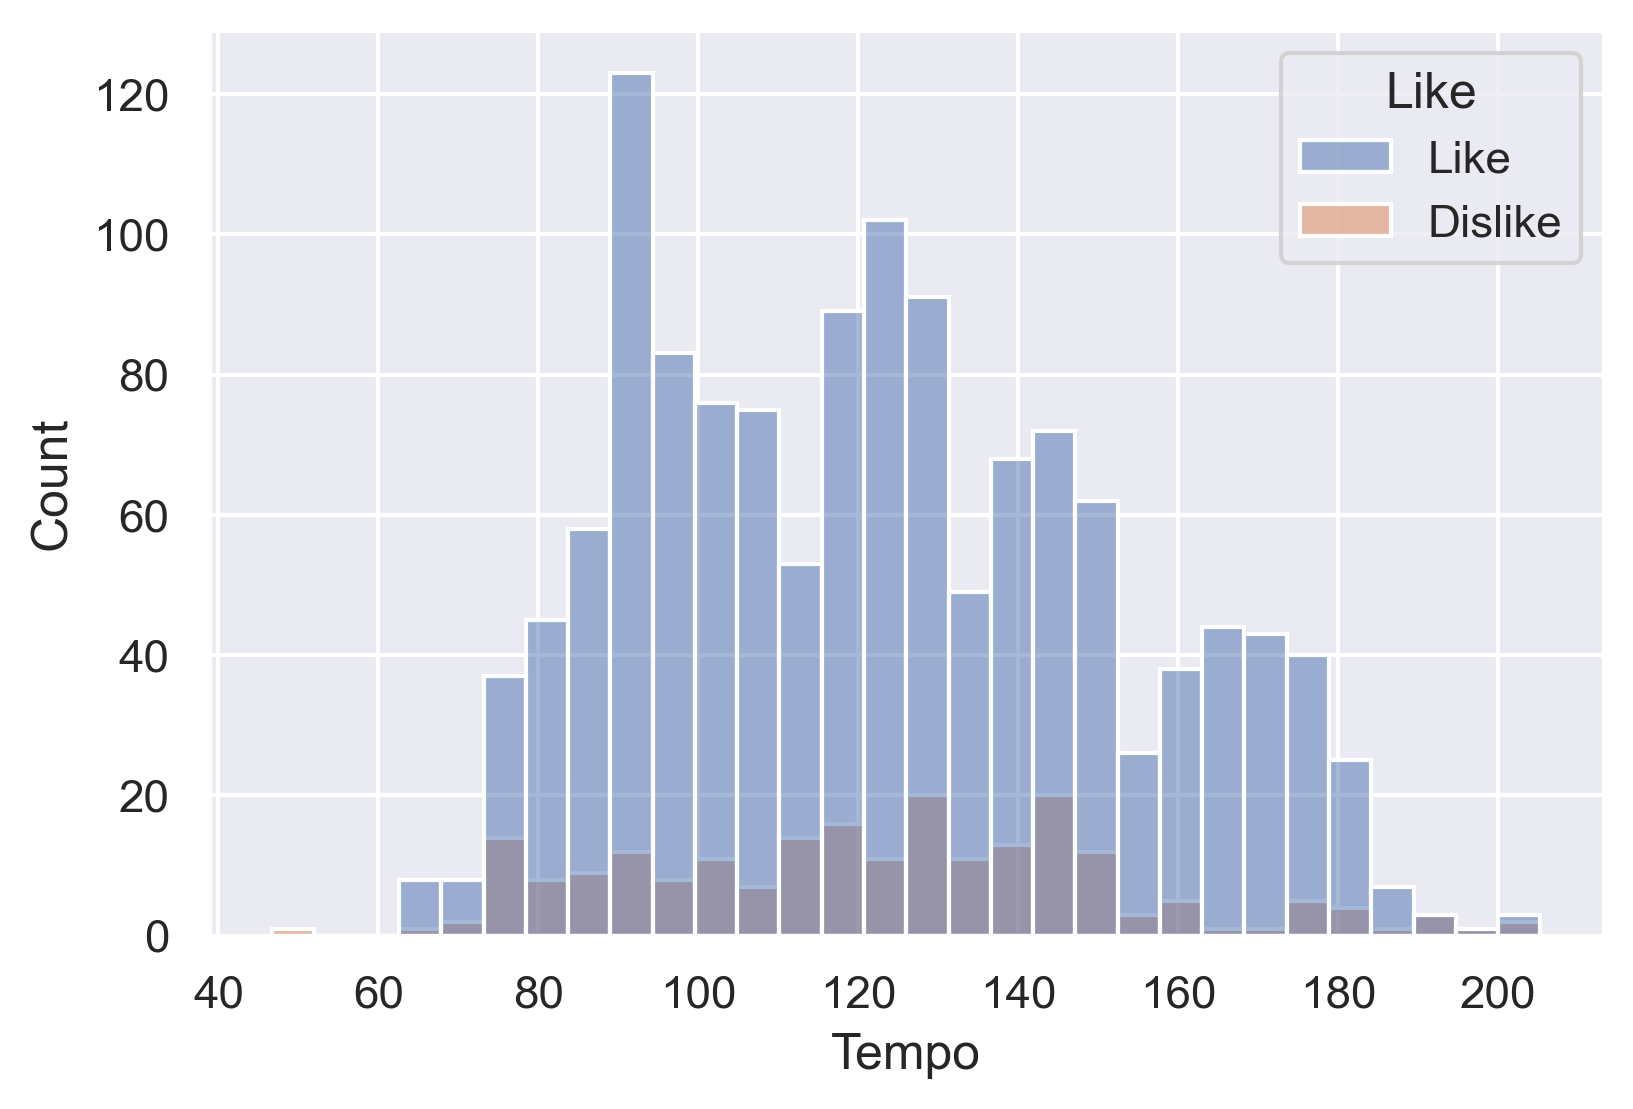

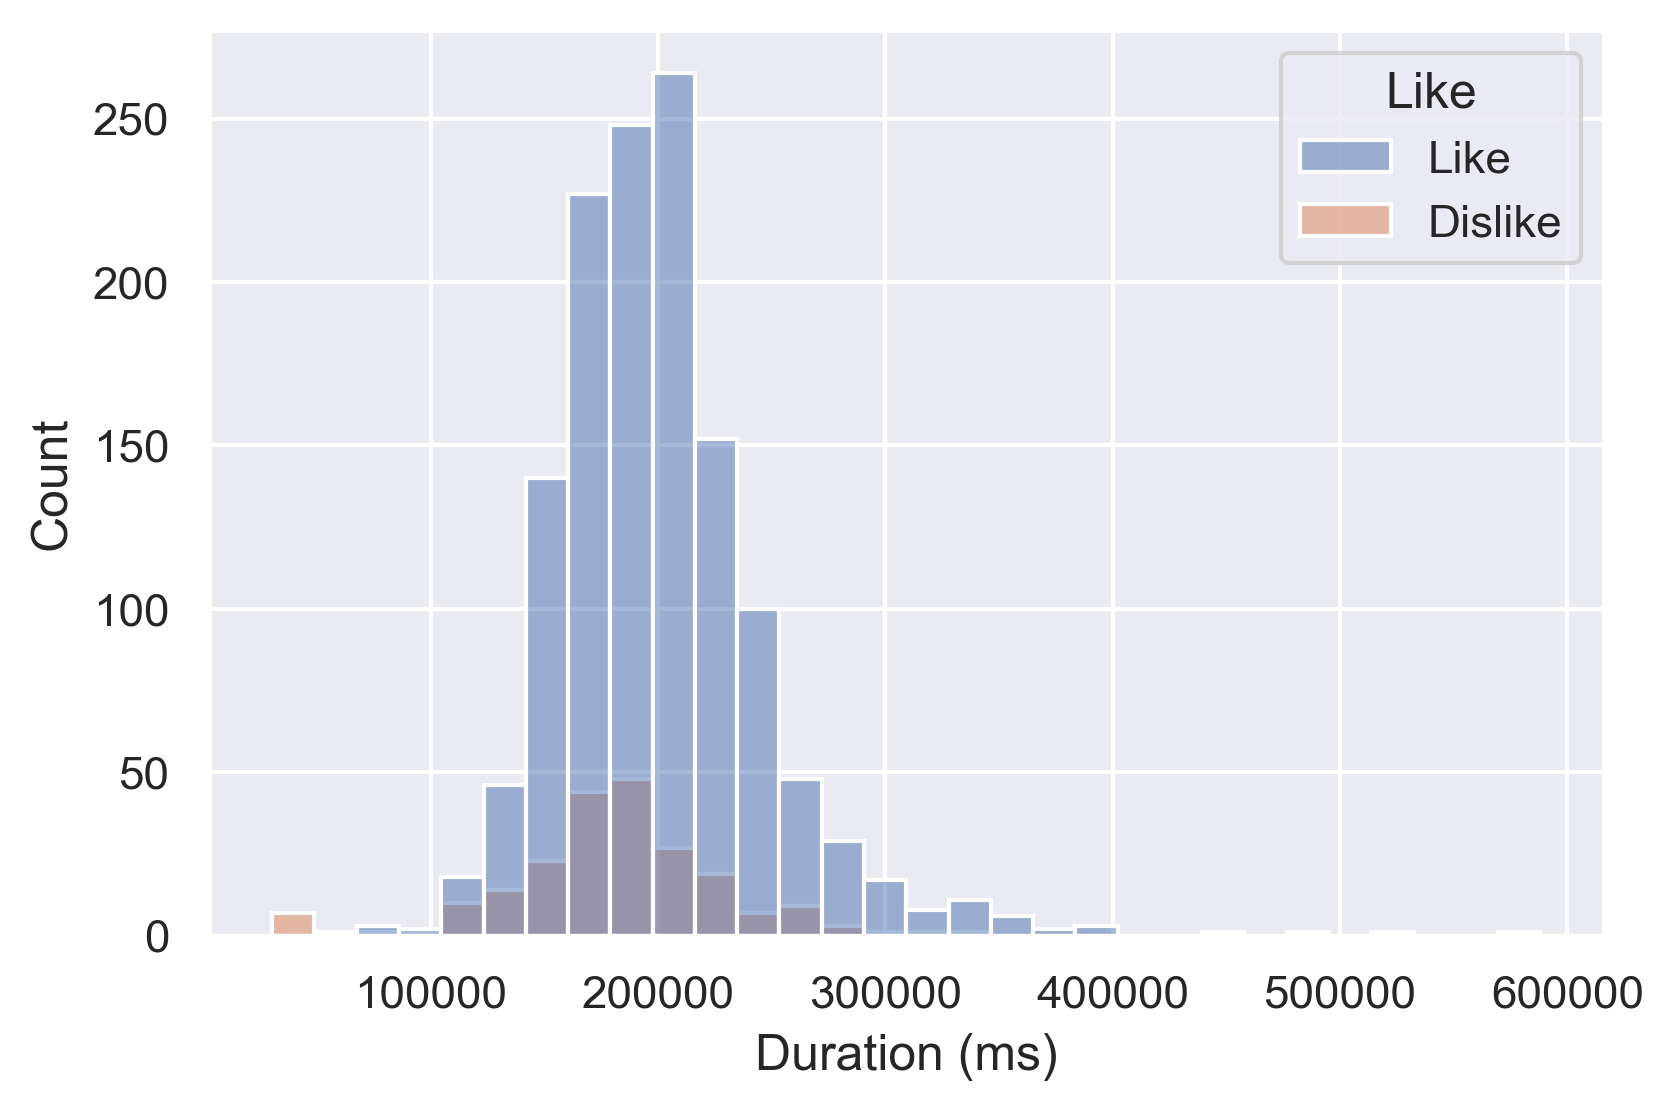

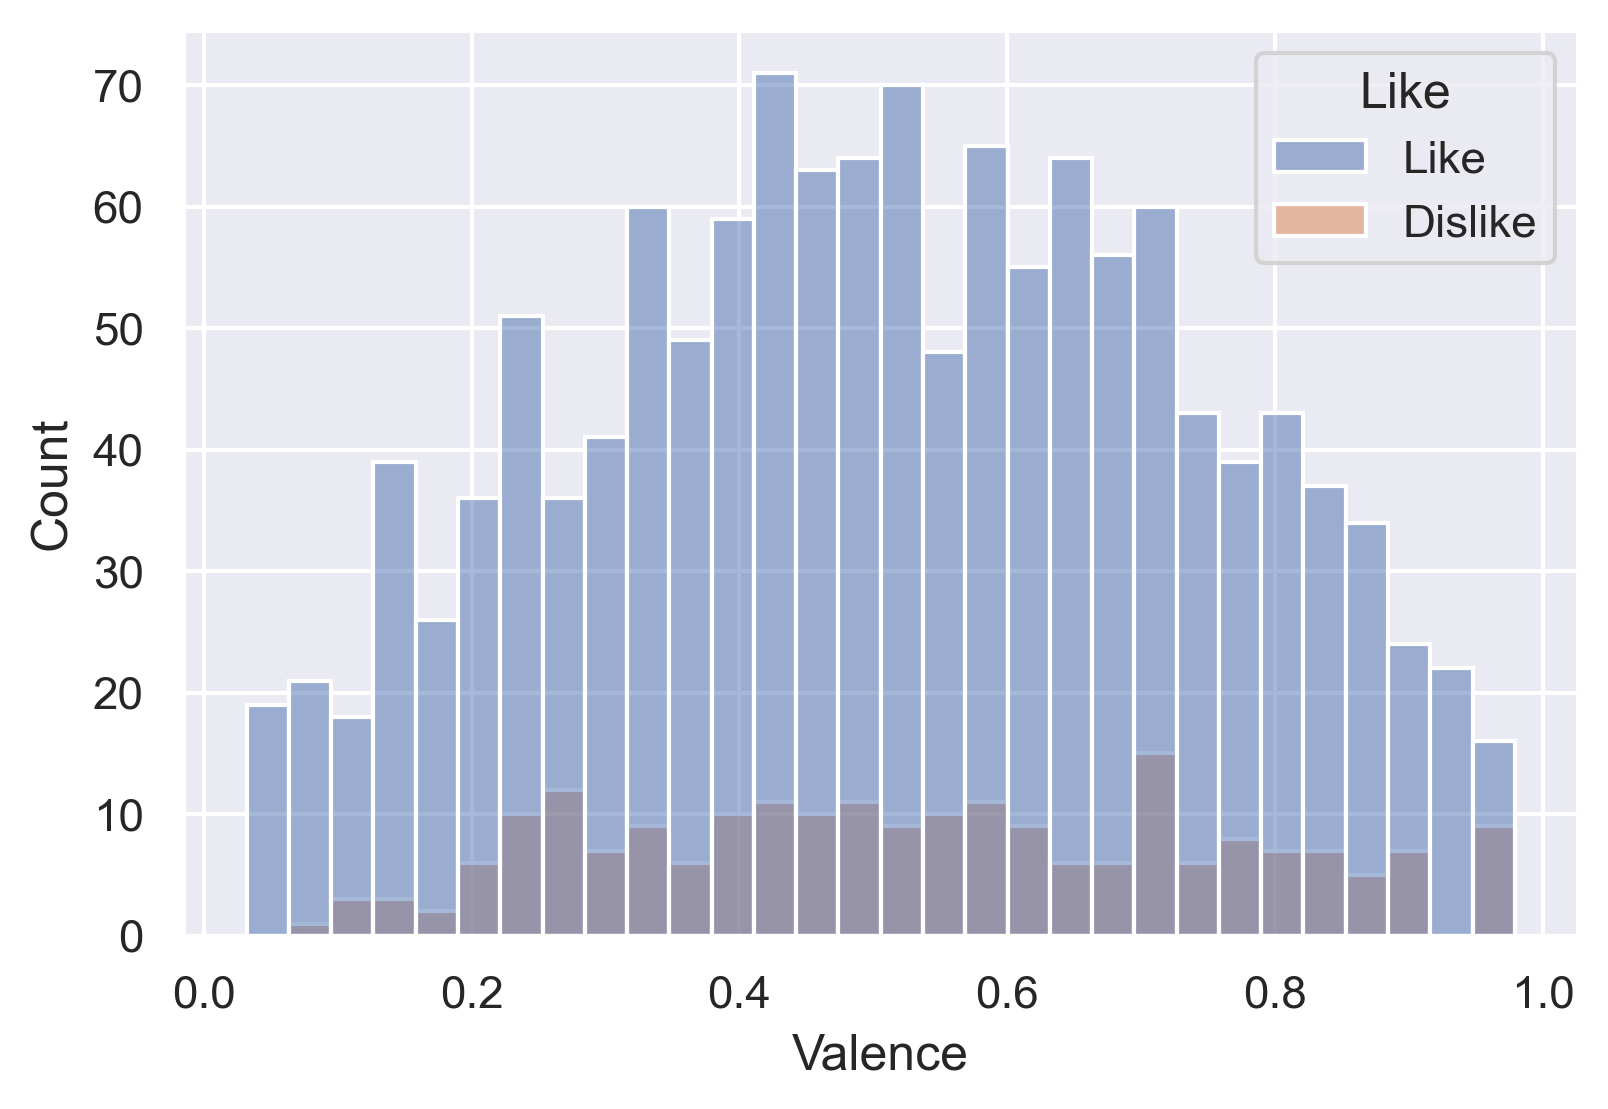

In [23]:
df['Like'] = df['Popularity'].apply(lambda x: 'Like' if x>=60 else 'Dislike')
for i, name in enumerate(features):
    plt.figure(dpi=300)
    sns.histplot(data=df,x=name,hue='Like', bins=30, alpha=0.5)
    plt.xlabel(name)
    plt.savefig('{}_all'.format(name))

In [10]:
like = df['Popularity']

In [15]:
df['Like'] = df['Popularity'].apply(lambda x: 'Like' if x>=60 else 'Dislike')
df[[name, 'Like']]

,Valence,Like
0,0.589,Like
1,0.478,Like
2,0.688,Like
3,0.591,Like
4,0.894,Like
...,...,...
1551,0.608,Like
1552,0.714,Like
1553,0.394,Like
1554,0.881,Like
